# **04_FeatureEngineering**

## Objectives

* To identify and evaluate the best transformations and modeling for our dataset, to develop a predictive model for asthma status (Diagnosis)

## Inputs

* Train and test sets generated to be used (TestSetCleaned.csv and TrainSetCleaned.csv)

## Outputs

* Generation of features to be engineered.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/AsthmaBurden/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/AsthmaBurden'

# Load the data

Section 1 content

Load the cleaned train dataset:

In [4]:
import pandas as pd

train_dataset_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainDataset = pd.read_csv(train_dataset_path)
TrainDataset.head(5)

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0  66.0       0          1               0  19.767985        0   
1  31.0       0          0               1  31.821008        1   
2  23.0       0          0               1  38.766504        0   
3  10.0       0          0               0  37.503106        0   
4  32.0       0          0               0  22.697123        0   

   PhysicalActivity  DietQuality  SleepQuality  PollutionExposure  ...  \
0          4.348719     5.428364      6.812669           2.857622  ...   
1          8.516835     3.532328      9.442670           9.240483  ...   
2          1.597617     3.504583      4.692634           0.756546  ...   
3          0.990294     6.208665      6.866633           1.697011  ...   
4          4.238294     6.802546      7.059210           1.368226  ...   

   GastroesophagealReflux  LungFunctionFEV1  LungFunctionFVC  Wheezing  \
0                       0          3.727812         1.509842         0   
1                       1          1.883568         2.592148         0   
2                       0          1.514000         2.433328         0   
3                       0          3.425449         3.047130         0   
4                       0          2.587983         5.268322         1   

   ShortnessOfBreath  ChestTightness  Coughing  NighttimeSymptoms  \
0                  1               1         1                  1   
1                  0               0         0                  1   
2                  1               0         0                  0   
3                  1               0         1                  1   
4                  1               1         0                  1   

   ExerciseInduced  Diagnosis  
0                0          0  
1                1          1  
2                0          0  
3                1          0  
4                1          1  

[5 rows x 27 columns]

Load the cleaned test dataset:

In [5]:
test_dataset_path = "outputs/datasets/cleaned/TestSetCleaned.csv"
TestDataset = pd.read_csv(test_dataset_path)
TestDataset.head(5)

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0  15.0       1          0               1  17.860860        0   
1  64.0       1          1               1  31.646910        1   
2  66.0       0          1               1  35.255664        0   
3  63.0       1          0               0  23.703577        1   
4  19.0       0          0               1  21.565091        0   

   PhysicalActivity  DietQuality  SleepQuality  PollutionExposure  ...  \
0          9.311786     7.309806      4.700892           6.521040  ...   
1          2.579429     5.351133      5.980028           6.022821  ...   
2          9.481774     7.296624      6.325690           7.193729  ...   
3          8.590992     3.831183      9.326136           0.884221  ...   
4          5.049448     5.400700      7.406241           7.413221  ...   

   GastroesophagealReflux  LungFunctionFEV1  LungFunctionFVC  Wheezing  \
0                       0          1.975612         5.517010         0   
1                       0          3.710141         3.980213         1   
2                       1          2.408840         2.659205         0   
3                       1          1.255892         5.674456         0   
4                       0          1.955379         2.072226         1   

   ShortnessOfBreath  ChestTightness  Coughing  NighttimeSymptoms  \
0                  1               0         0                  1   
1                  0               0         1                  1   
2                  0               1         0                  0   
3                  1               1         1                  0   
4                  0               1         0                  1   

   ExerciseInduced  Diagnosis  
0                1          0  
1                0          0  
2                1          0  
3                1          0  
4                0          0  

[5 rows x 27 columns]

---

# Feature Engineering

Set the target feature (Diagnosis):

In [ ]:
target_feature = "Diagnosis"

As the dataset includes binary features already, feature scaling or encoding is not needed.

In [7]:
df_engineering = (
    TrainDataset
        .select_dtypes(include='int')
        .columns
        .drop("Diagnosis")
)

TrainDataset[df_engineering].head()

Gender  Ethnicity  EducationLevel  Smoking  PetAllergy  \
0       0          1               0        0           0   
1       0          0               1        1           0   
2       0          0               1        0           0   
3       0          0               0        0           0   
4       0          0               0        0           1   

   FamilyHistoryAsthma  HistoryOfAllergies  Eczema  HayFever  \
0                    0                   0       0         1   
1                    1                   0       0         0   
2                    1                   0       0         0   
3                    0                   1       0         0   
4                    0                   0       0         0   

   GastroesophagealReflux  Wheezing  ShortnessOfBreath  ChestTightness  \
0                       0         0                  1               1   
1                       1         0                  0               0   
2                       0         0                  1               0   
3                       0         0                  1               0   
4                       0         1                  1               1   

   Coughing  NighttimeSymptoms  ExerciseInduced  
0         1                  1                0  
1         0                  1                1  
2         0                  0                0  
3         1                  1                1  
4         0                  1                1

Create a separate DataFrame for the continuous features of interest:

In [8]:
df_engineering = (
    TrainDataset
        .select_dtypes(include='float').columns.tolist()
)
df_engineering = TrainDataset[df_engineering].copy()
df_engineering.head(5)

Age        BMI  PhysicalActivity  DietQuality  SleepQuality  \
0  66.0  19.767985          4.348719     5.428364      6.812669   
1  31.0  31.821008          8.516835     3.532328      9.442670   
2  23.0  38.766504          1.597617     3.504583      4.692634   
3  10.0  37.503106          0.990294     6.208665      6.866633   
4  32.0  22.697123          4.238294     6.802546      7.059210   

   PollutionExposure  PollenExposure  DustExposure  LungFunctionFEV1  \
0           2.857622        6.022584      4.446010          3.727812   
1           9.240483        8.298979      2.287043          1.883568   
2           0.756546        2.155485      5.364329          1.514000   
3           1.697011        0.696289      2.918207          3.425449   
4           1.368226        7.404263      0.686262          2.587983   

   LungFunctionFVC  
0         1.509842  
1         2.592148  
2         2.433328  
3         3.047130  
4         5.268322

Use the custom function from The Code Institutes Churnonmeter to apply a set of numerical feature engineering transformations.

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine import transformation as vt

# Customized function from the Code Institutes "Churnometer" Walkthrough Project
def DiagnosticPlots_Numerical(df, variable):
    """
    Perform quick feature engineering on numerical variables to evaluate 
    transformations that improve distribution shapes.

    Steps:
    - Applies multiple numerical transformations (log, log10, reciprocal, power, Box-Cox, Yeo-Johnson) to all numerical columns.
    - Visualizes each original and transformed variable’s distribution using histogram, QQ plot, and boxplot.
    - Automatically skips transformations that are not applicable (e.g., log of negative numbers).

    Parameters:
        df (pd.DataFrame): Input dataset containing numerical features only.

    Returns:
        pd.DataFrame: Dataset with original numerical features plus additional columns for each successfully applied transformation.
    """

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(df[variable], kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=20, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_Numerical(df, column):
    """
    Apply common numerical transformations to a single column.
    Returns the new dataframe and list of applied transformations.
    """
    df_feat_eng = df.copy()
    list_methods_worked = []

    transformers = {
        "log_e": vt.LogTransformer(variables=[column]),
        "log_10": vt.LogTransformer(variables=[column], base='10'),
        "reciprocal": vt.ReciprocalTransformer(variables=[column]),
        "power": vt.PowerTransformer(variables=[column]),
        "box_cox": vt.BoxCoxTransformer(variables=[column]),
        "yeo_johnson": vt.YeoJohnsonTransformer(variables=[column]),
    }

    for name, transformer in transformers.items():
        try:
            df_feat_eng[f"{column}_{name}"] = transformer.fit_transform(df_feat_eng)[column]
            list_methods_worked.append(f"{column}_{name}")
        except Exception:
            continue  # skip if transformation fails (e.g., negative values for log/Box-Cox)

    return df_feat_eng, list_methods_worked


def FeatureEngineeringAnalysis(df):
    """
    Apply numerical transformations to all numerical columns
    and visualize distributions.
    """
    numerical_columns = df.select_dtypes(include=['int', 'float']).columns
    df_feat_eng = df.copy()

    for column in numerical_columns:
        df_feat_eng, applied_transforms = FeatEngineering_Numerical(df_feat_eng, column)

        print(f"\n* Variable Analyzed: {column}")
        print(f"* Applied transformations: {applied_transforms}\n")

        for col in [column] + applied_transforms:
            DiagnosticPlots_Numerical(df_feat_eng, col)

    return df_feat_eng


Apply the function to the continuous features of interest:


* Variable Analyzed: Age
* Applied transformations: ['Age_log_e', 'Age_log_10', 'Age_reciprocal', 'Age_power', 'Age_box_cox', 'Age_yeo_johnson']



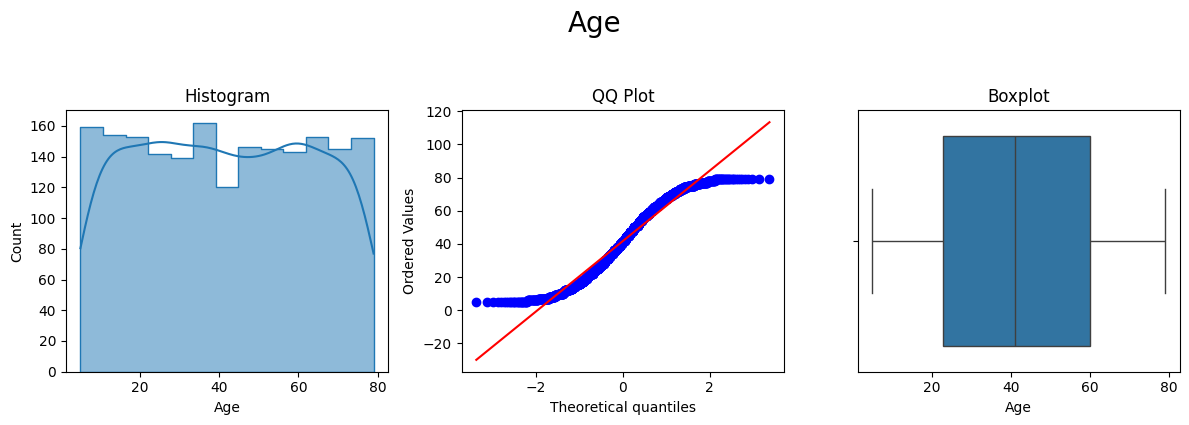

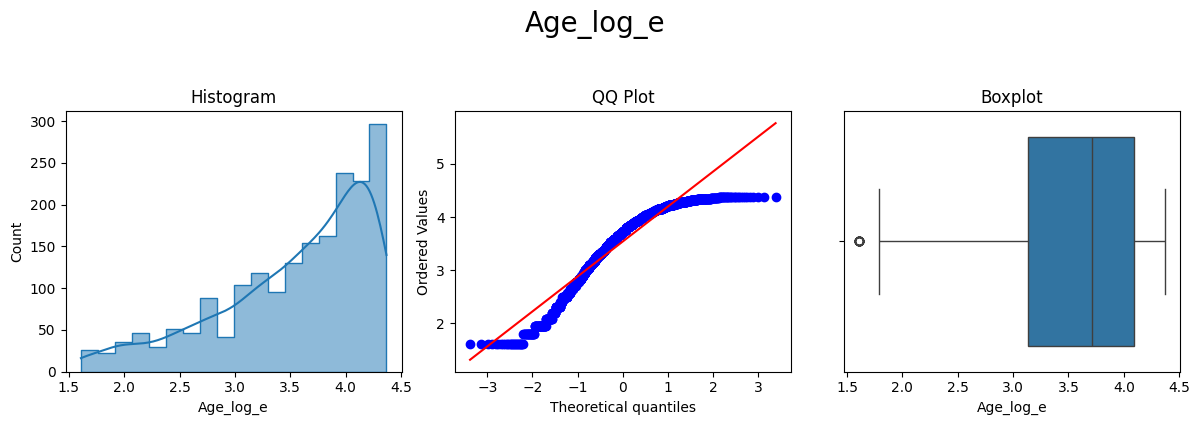

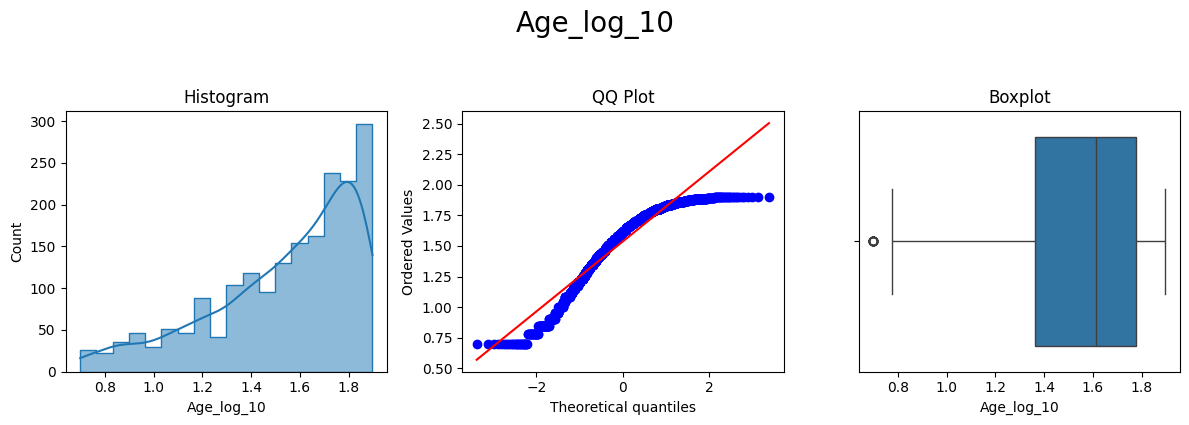

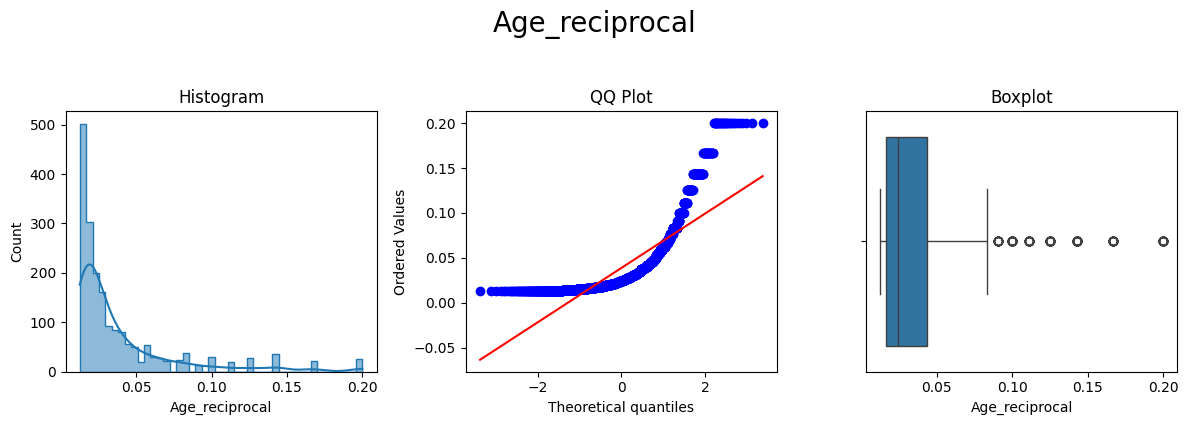

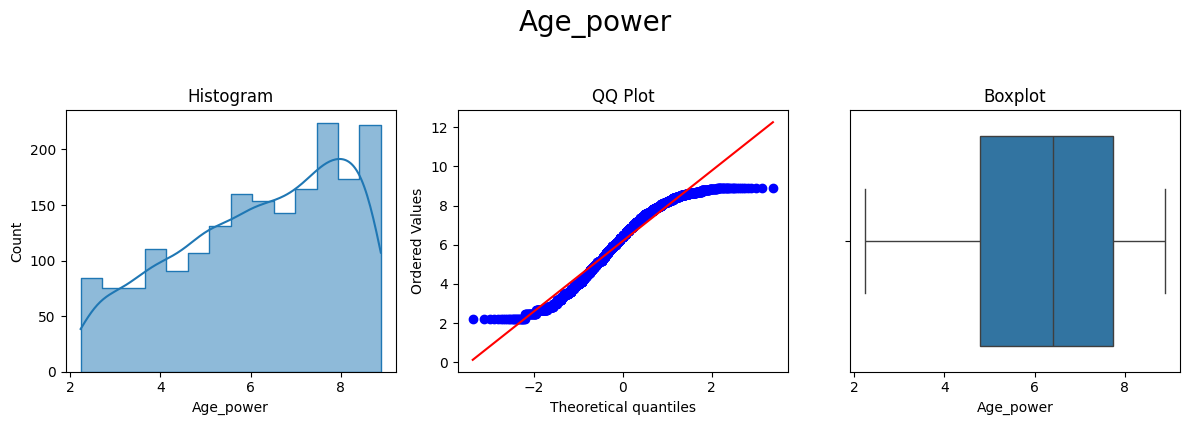

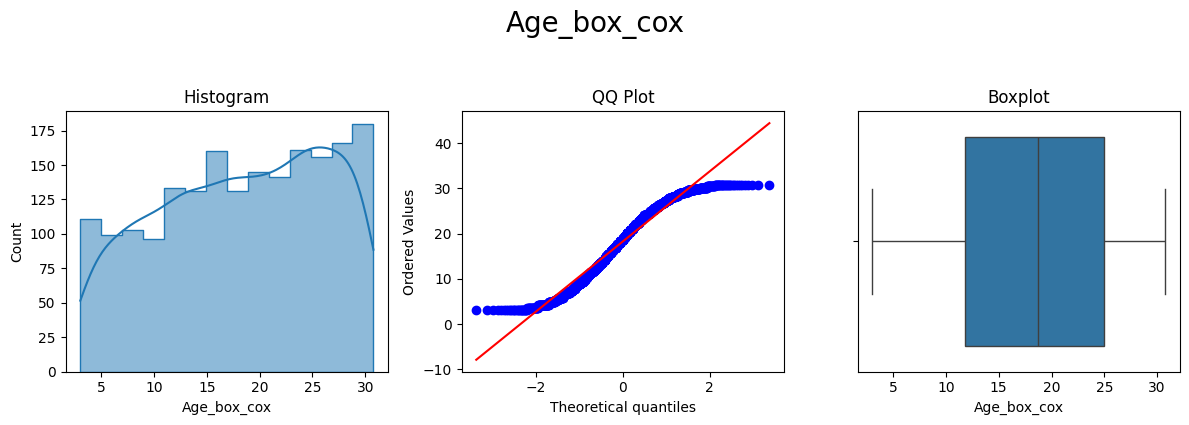

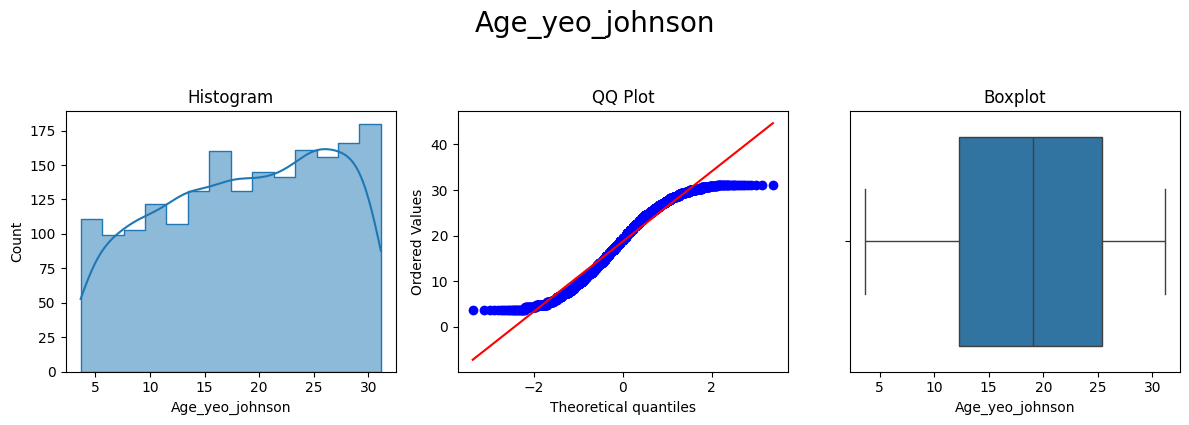


* Variable Analyzed: BMI
* Applied transformations: ['BMI_log_e', 'BMI_log_10', 'BMI_reciprocal', 'BMI_power', 'BMI_box_cox', 'BMI_yeo_johnson']



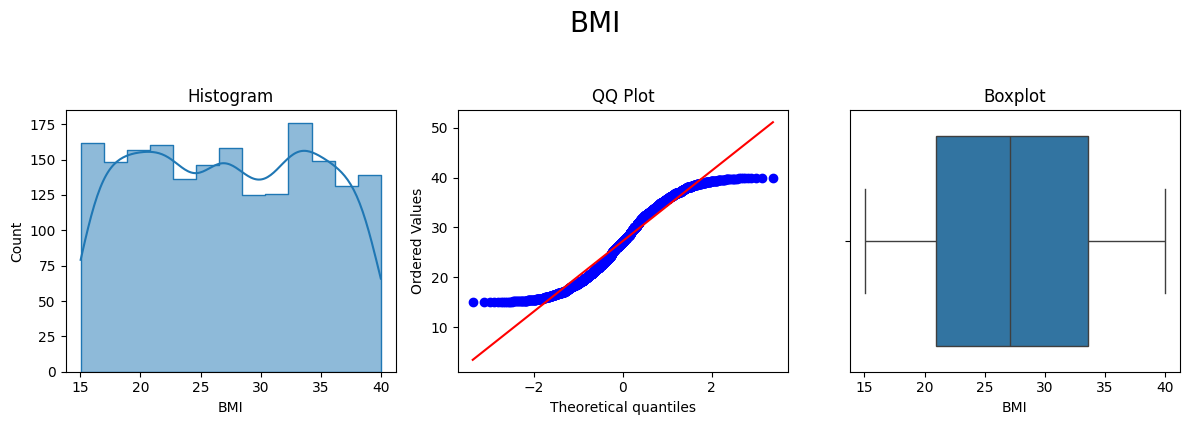

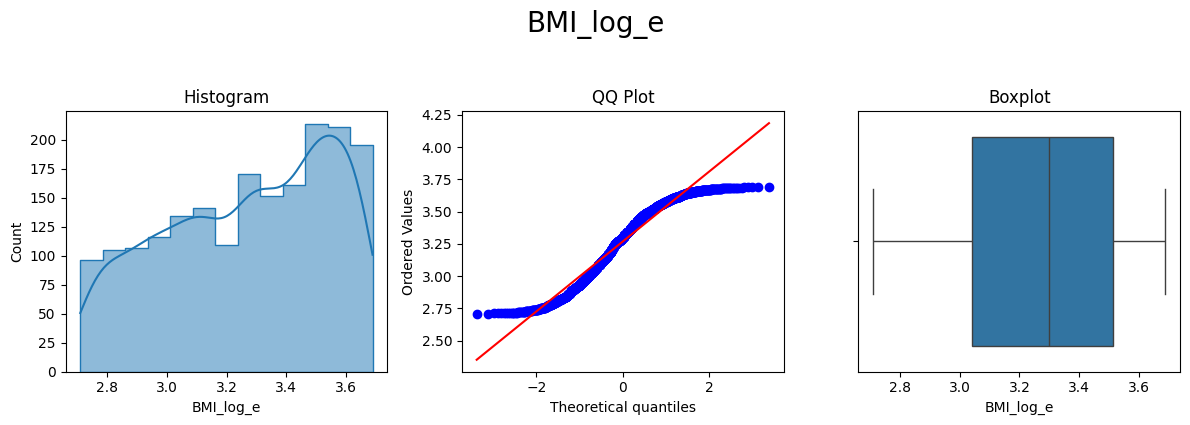

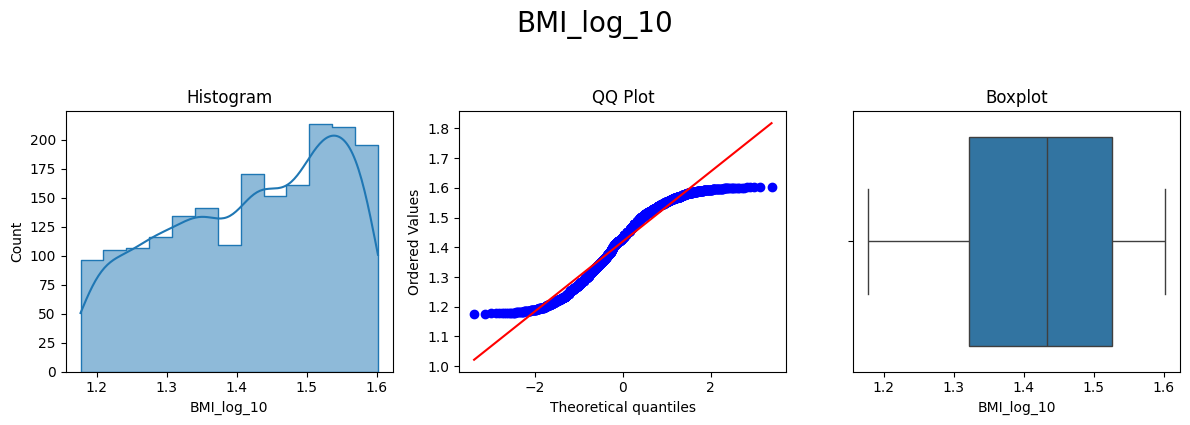

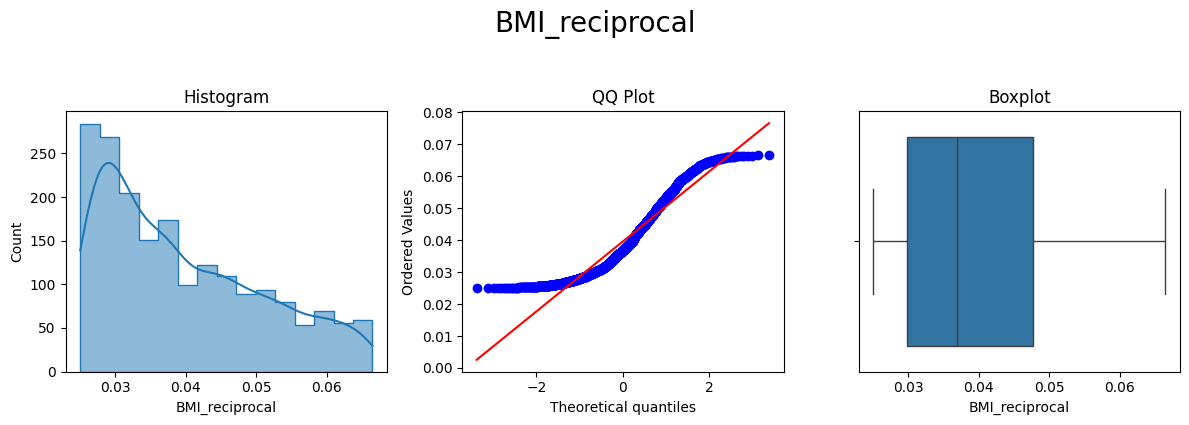

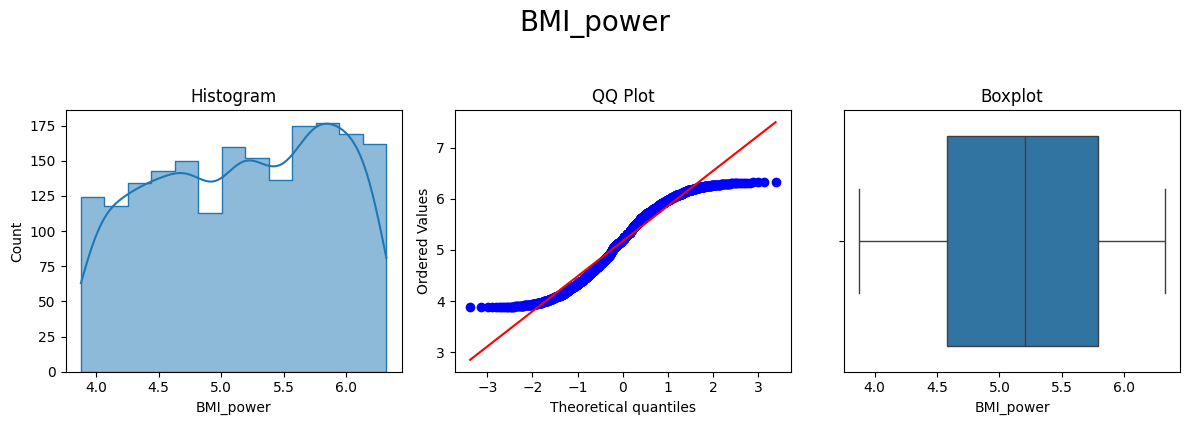

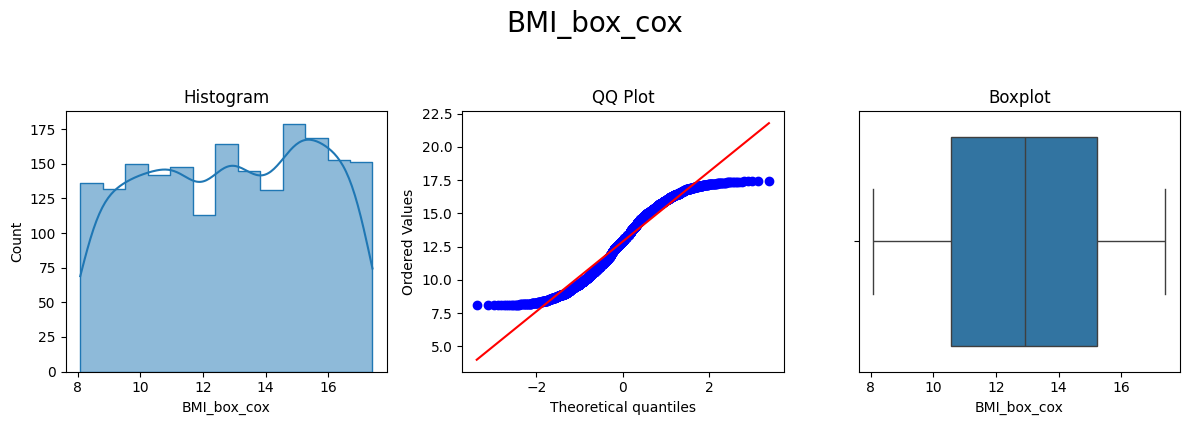

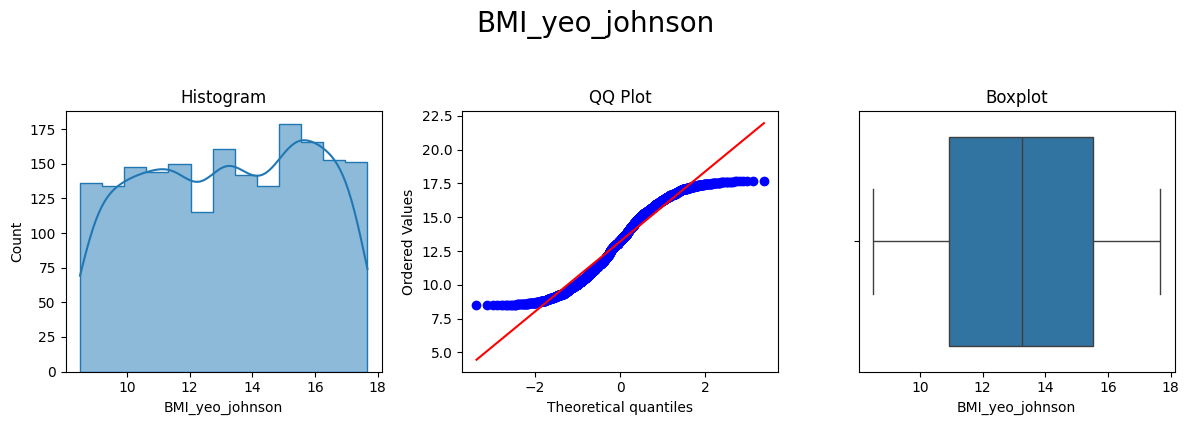


* Variable Analyzed: PhysicalActivity
* Applied transformations: ['PhysicalActivity_log_e', 'PhysicalActivity_log_10', 'PhysicalActivity_reciprocal', 'PhysicalActivity_power', 'PhysicalActivity_box_cox', 'PhysicalActivity_yeo_johnson']



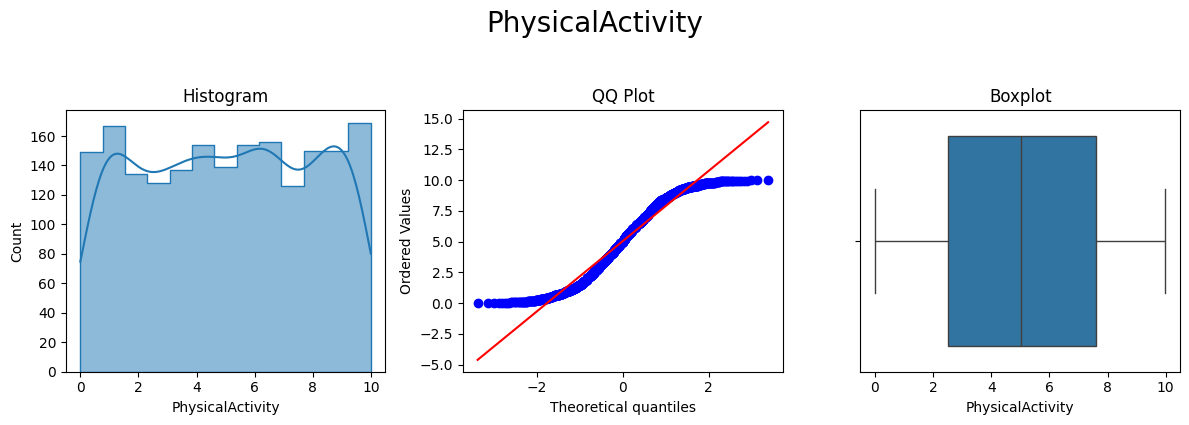

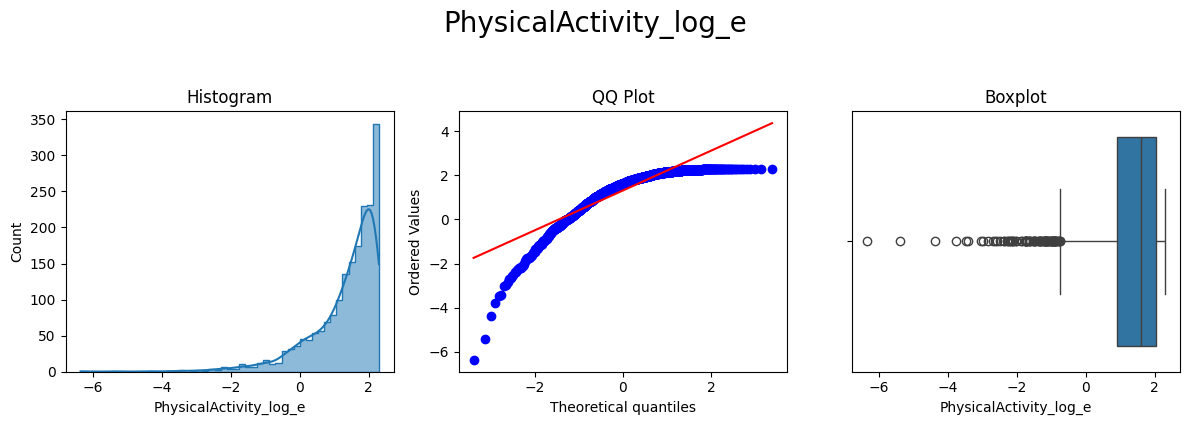

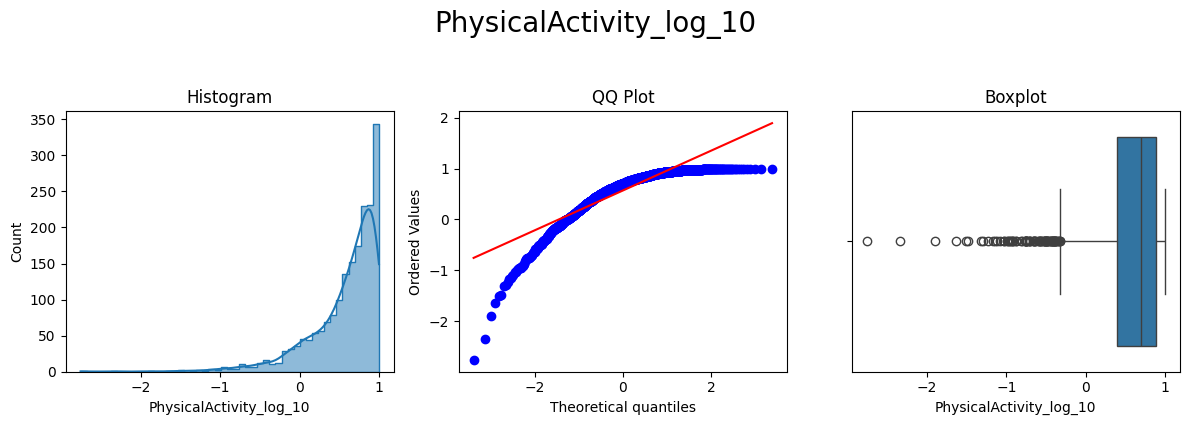

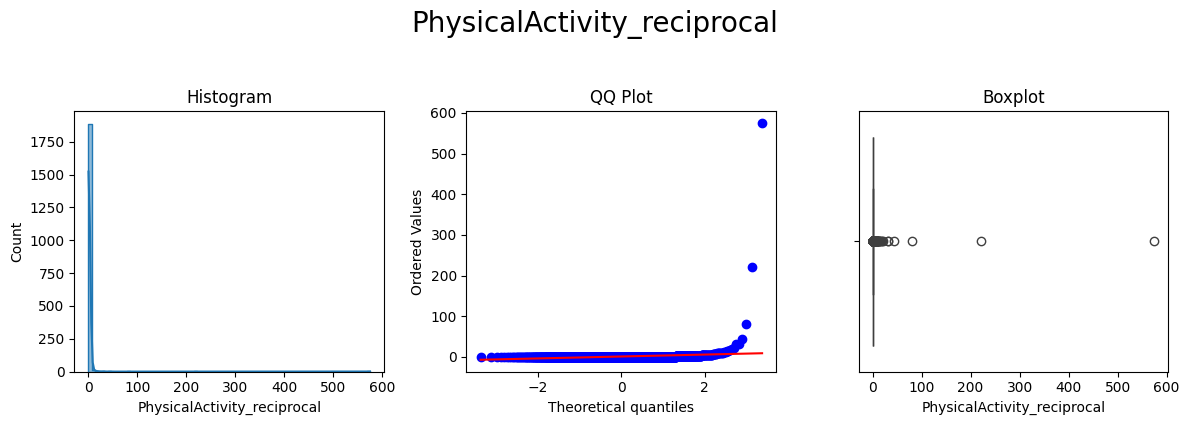

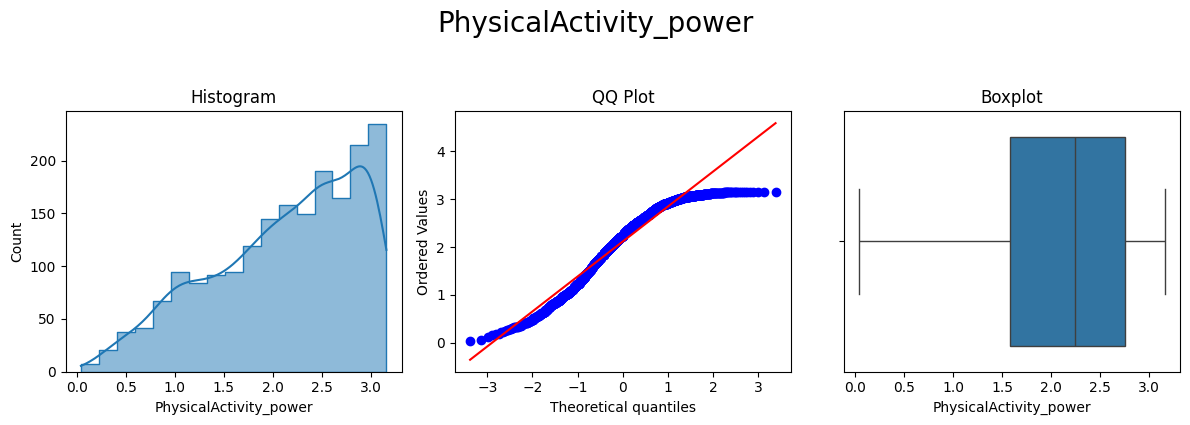

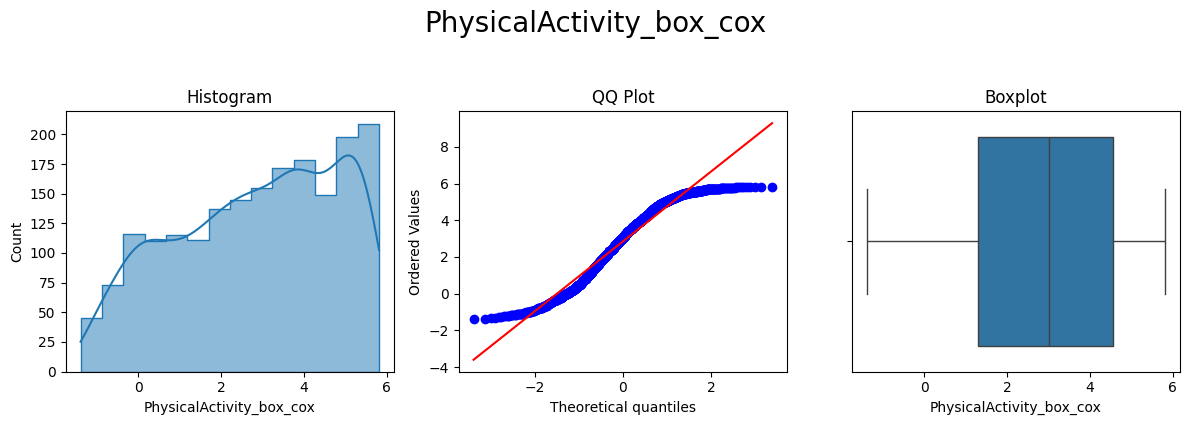

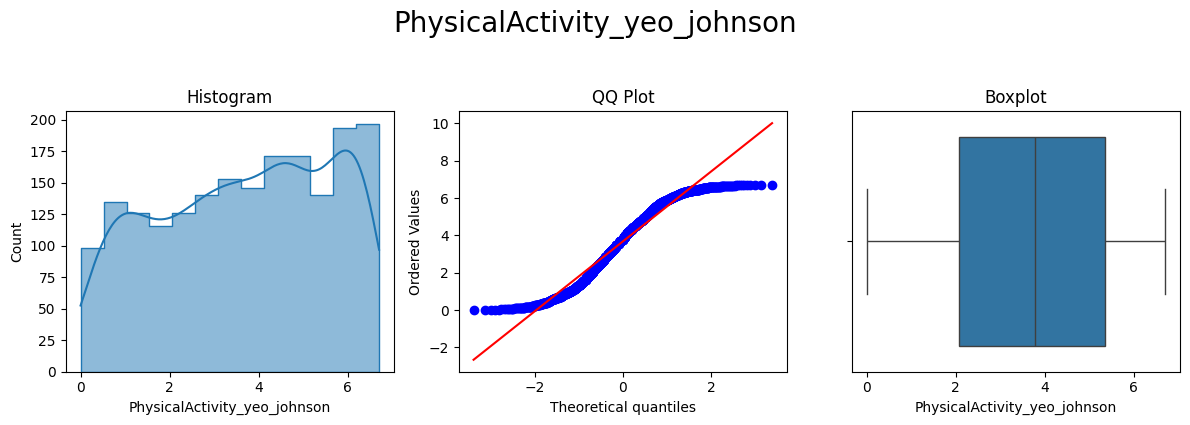


* Variable Analyzed: DietQuality
* Applied transformations: ['DietQuality_log_e', 'DietQuality_log_10', 'DietQuality_reciprocal', 'DietQuality_power', 'DietQuality_box_cox', 'DietQuality_yeo_johnson']



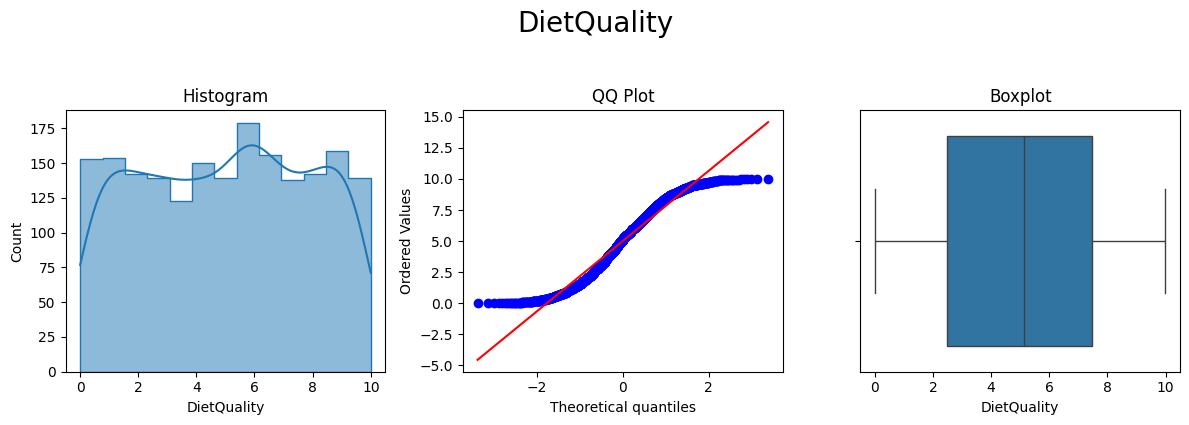

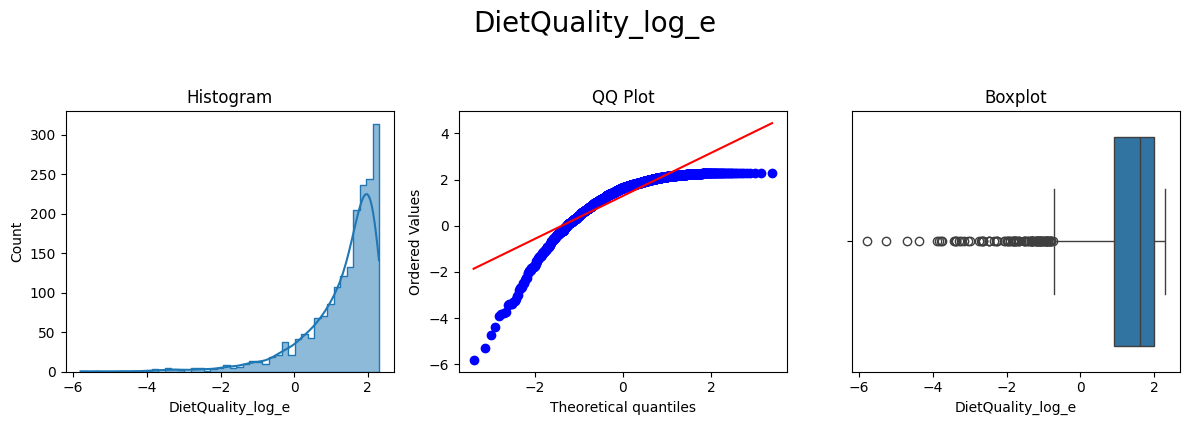

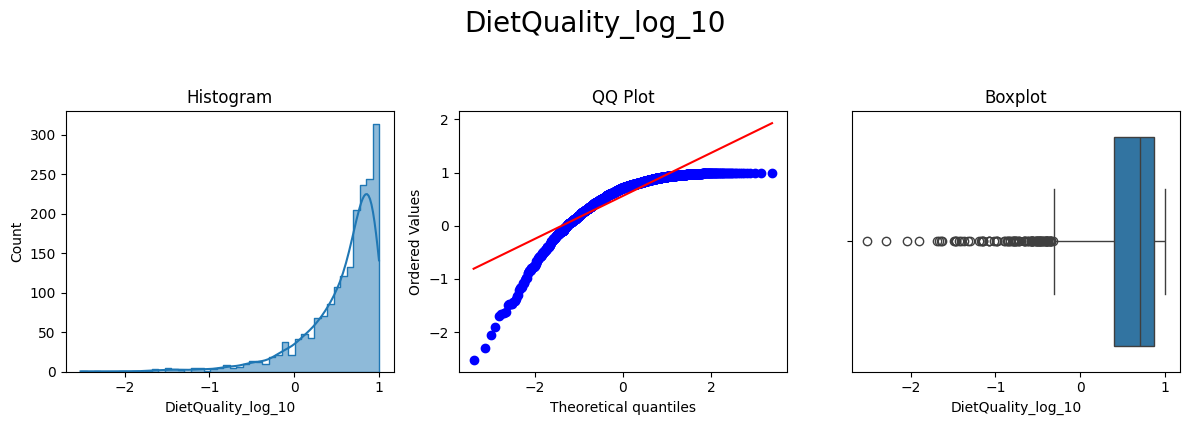

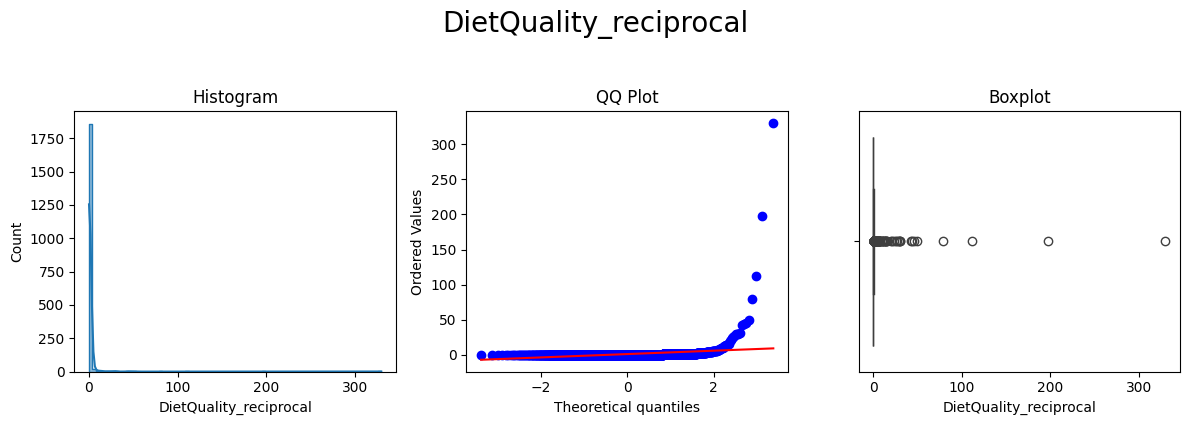

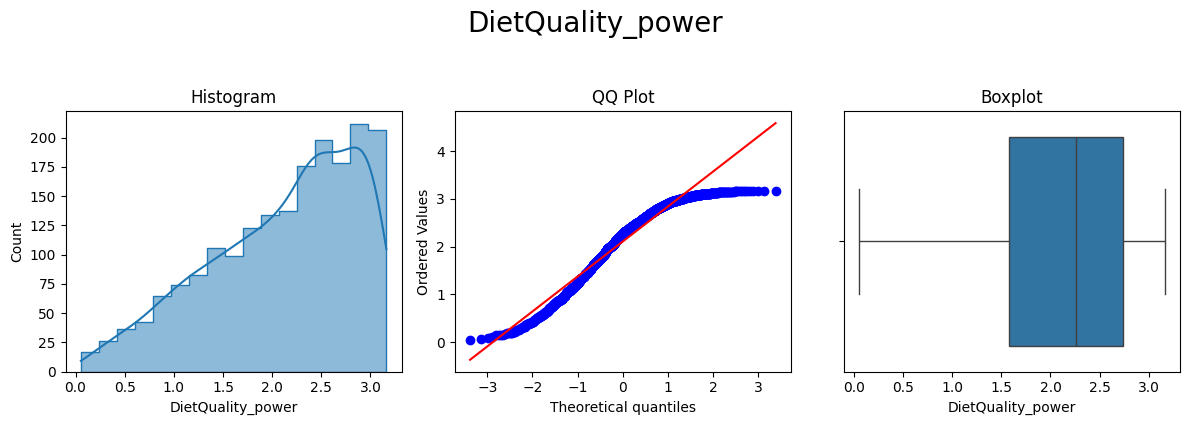

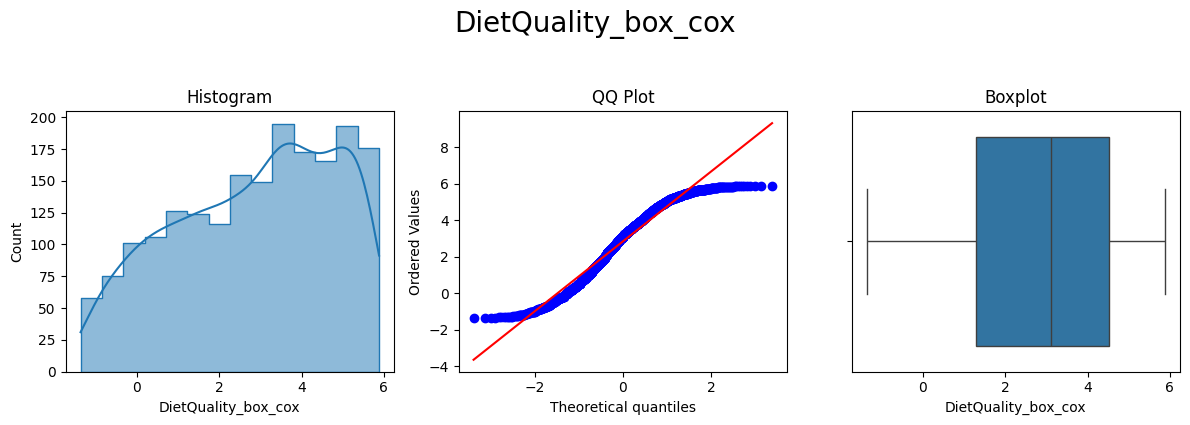

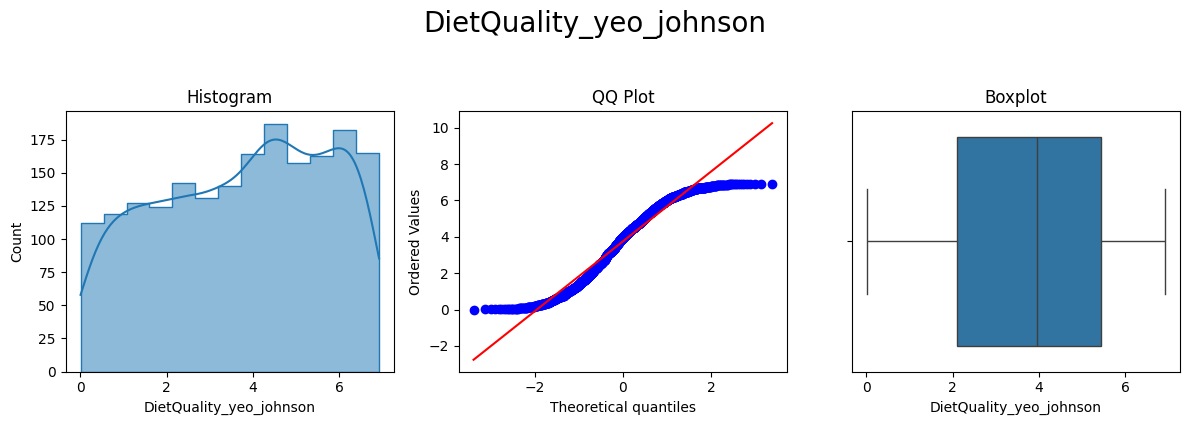


* Variable Analyzed: SleepQuality
* Applied transformations: ['SleepQuality_log_e', 'SleepQuality_log_10', 'SleepQuality_reciprocal', 'SleepQuality_power', 'SleepQuality_box_cox', 'SleepQuality_yeo_johnson']



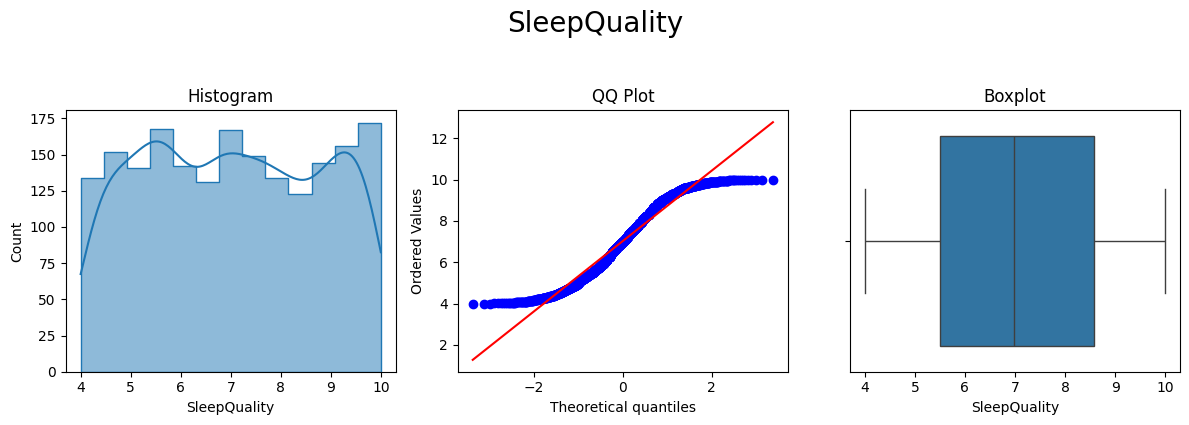

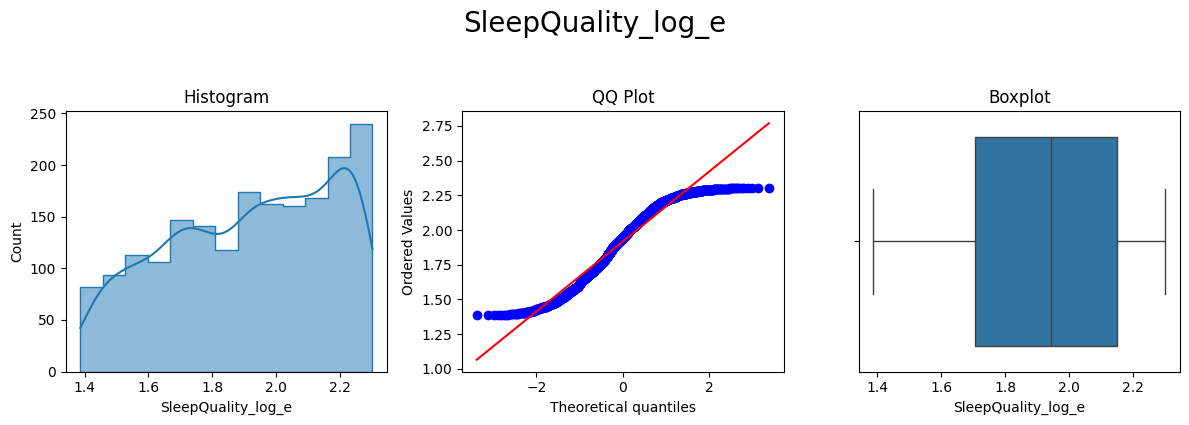

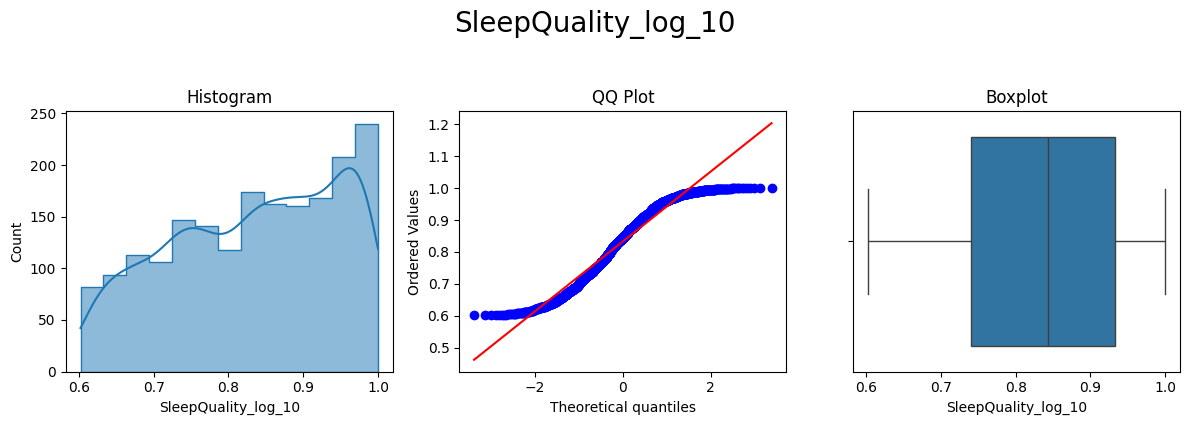

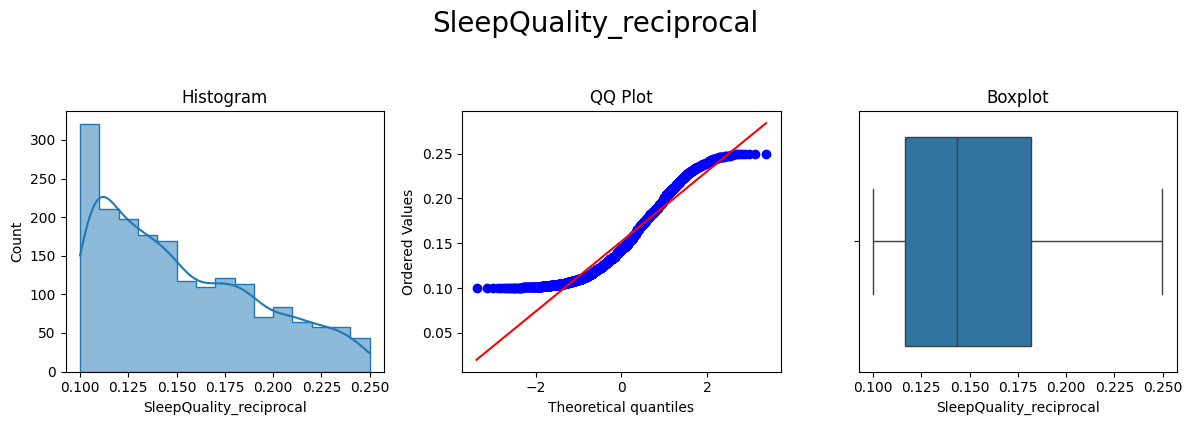

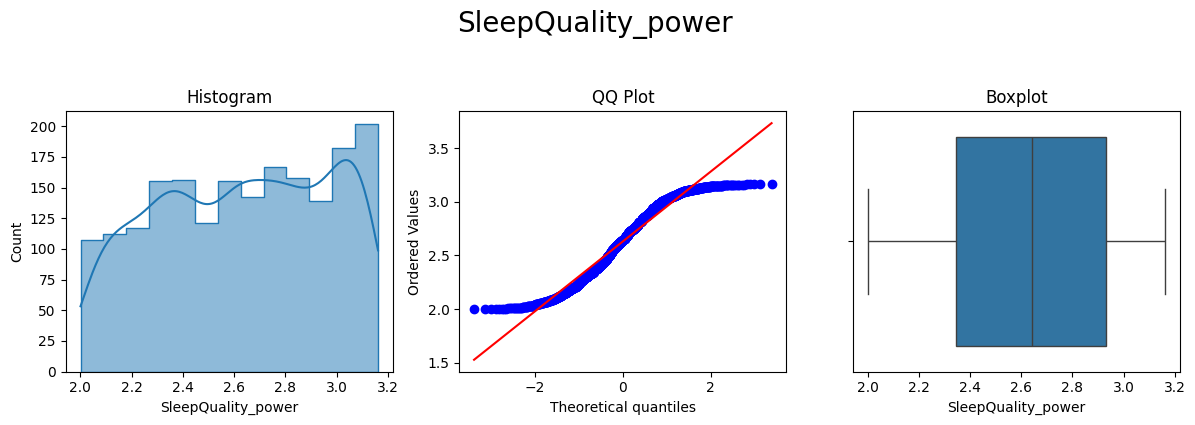

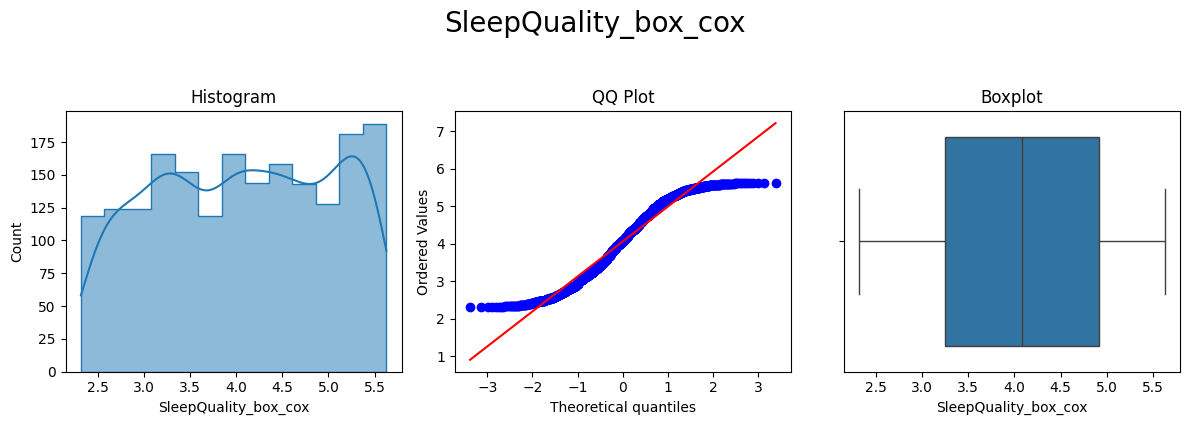

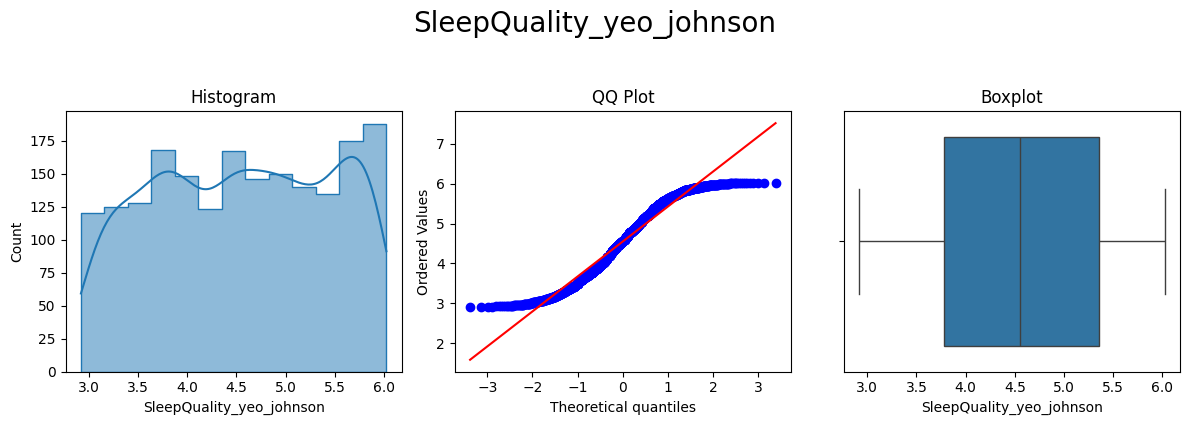


* Variable Analyzed: PollutionExposure
* Applied transformations: ['PollutionExposure_log_e', 'PollutionExposure_log_10', 'PollutionExposure_reciprocal', 'PollutionExposure_power', 'PollutionExposure_box_cox', 'PollutionExposure_yeo_johnson']



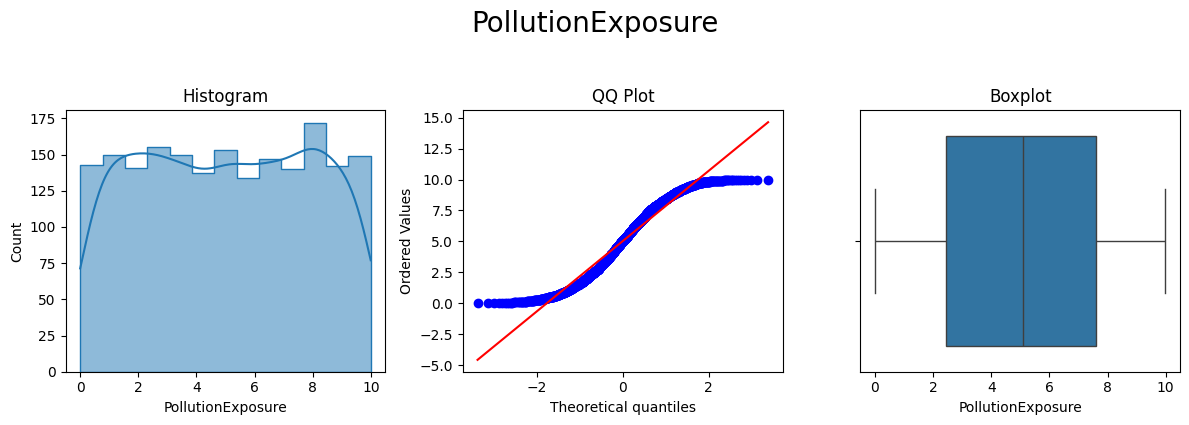

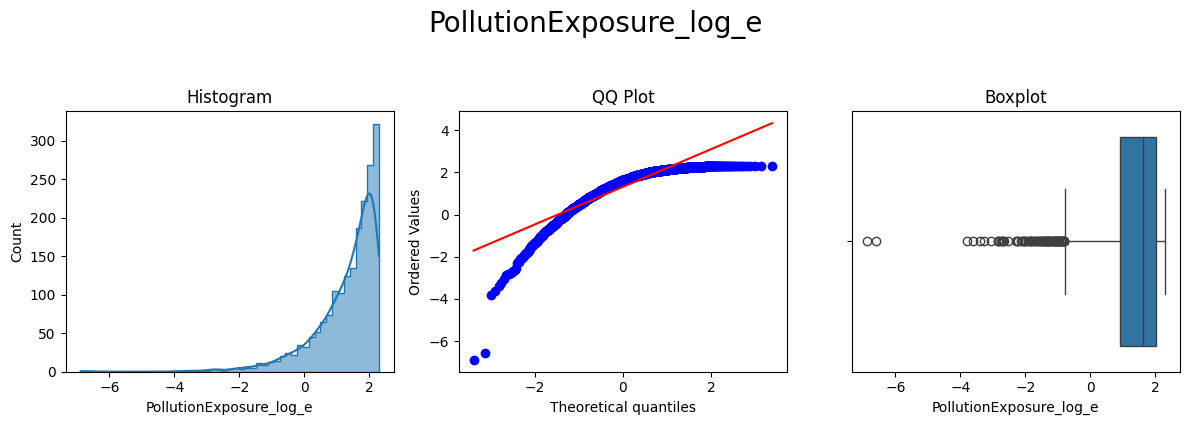

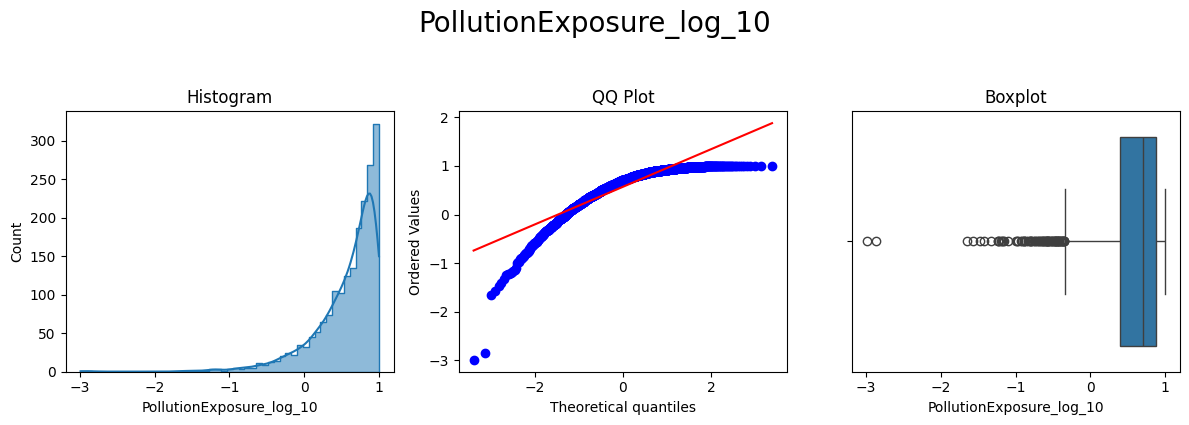

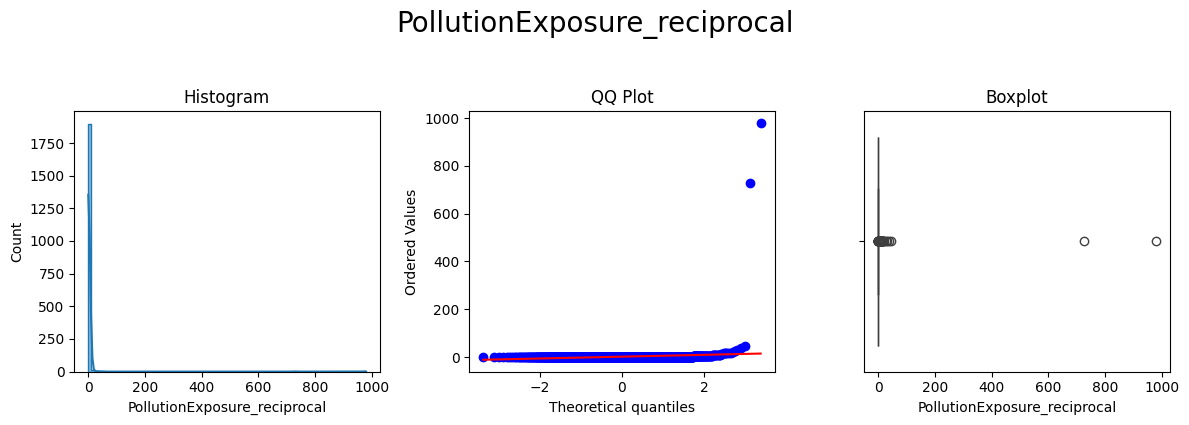

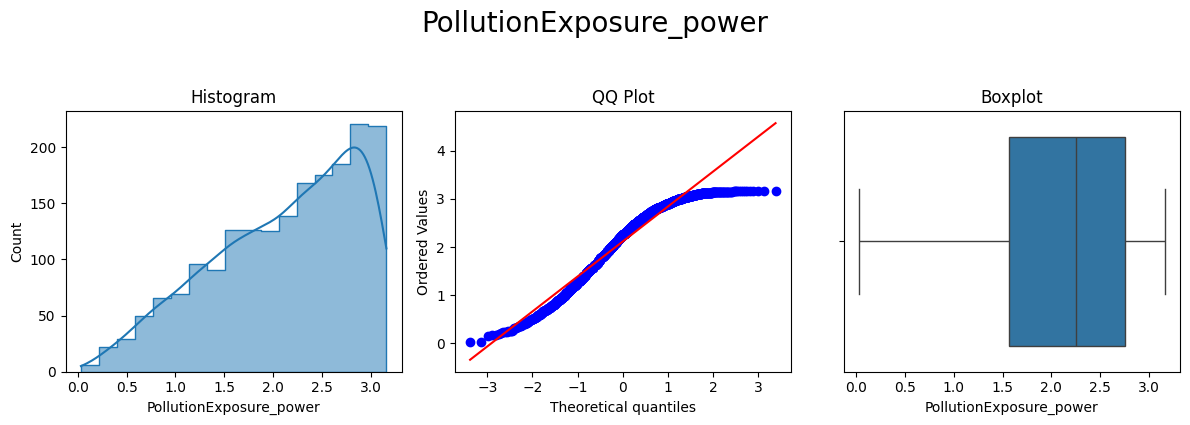

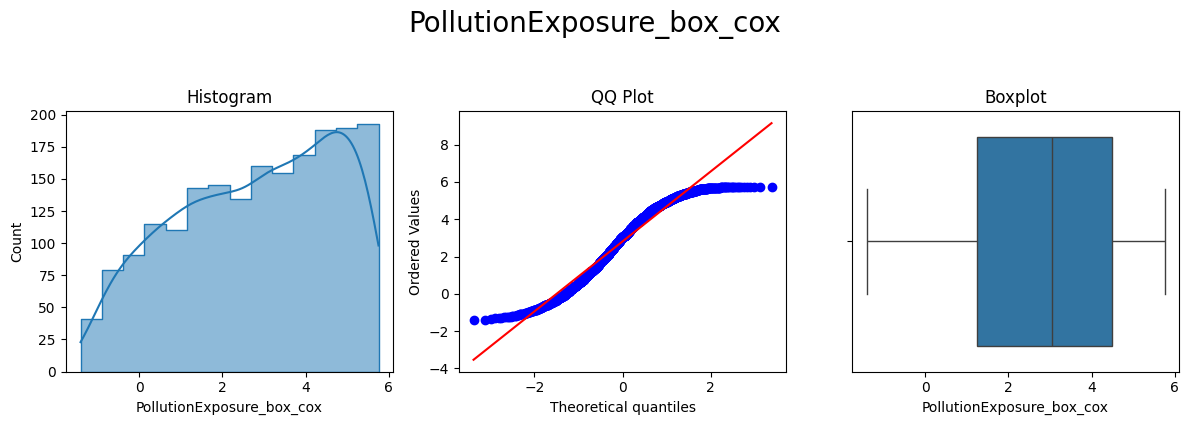

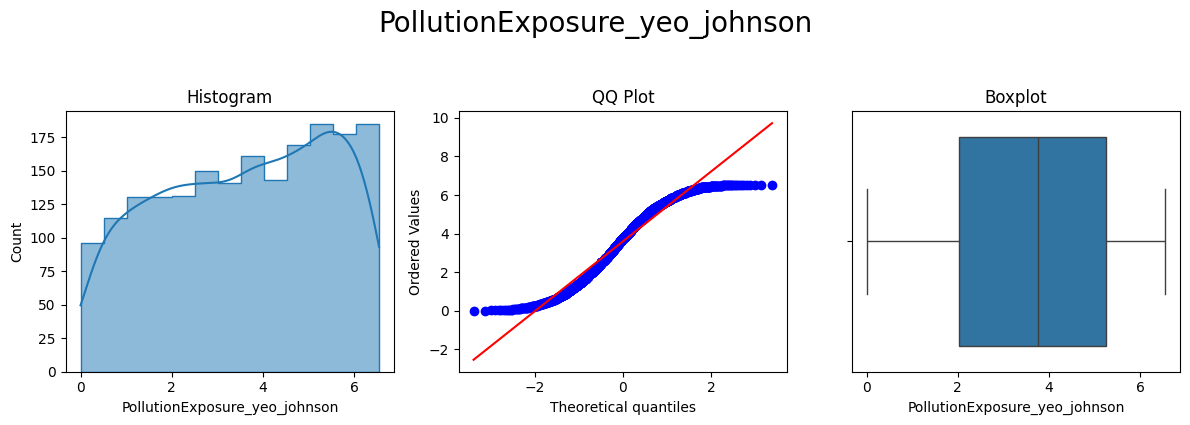


* Variable Analyzed: PollenExposure
* Applied transformations: ['PollenExposure_log_e', 'PollenExposure_log_10', 'PollenExposure_reciprocal', 'PollenExposure_power', 'PollenExposure_box_cox', 'PollenExposure_yeo_johnson']



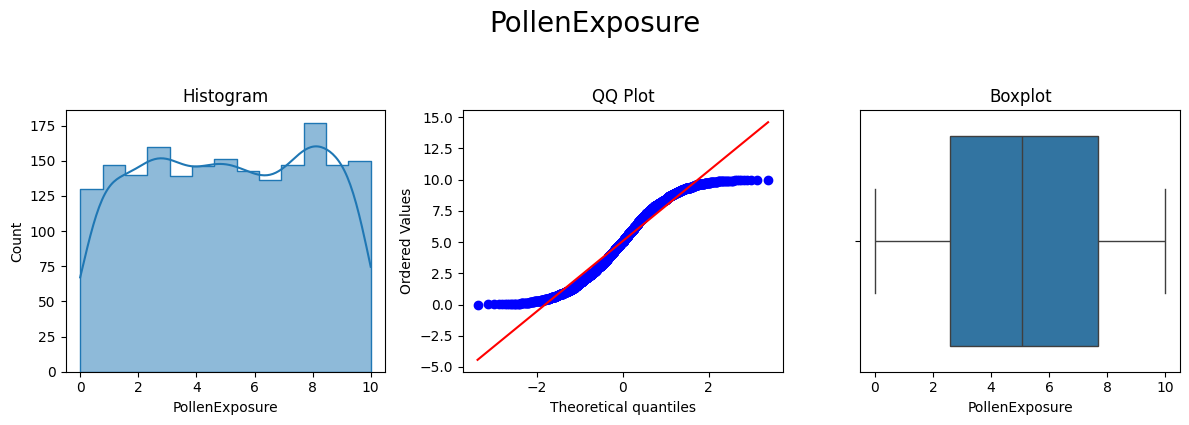

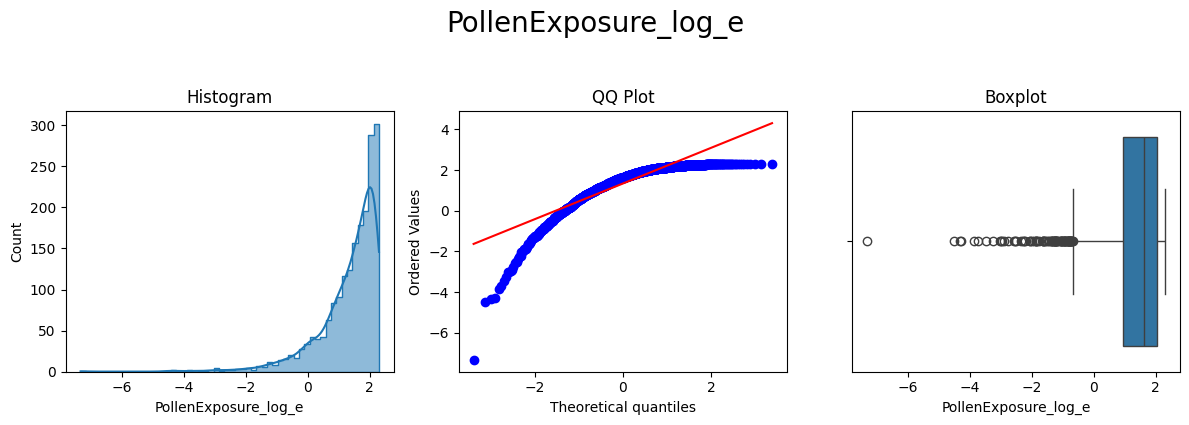

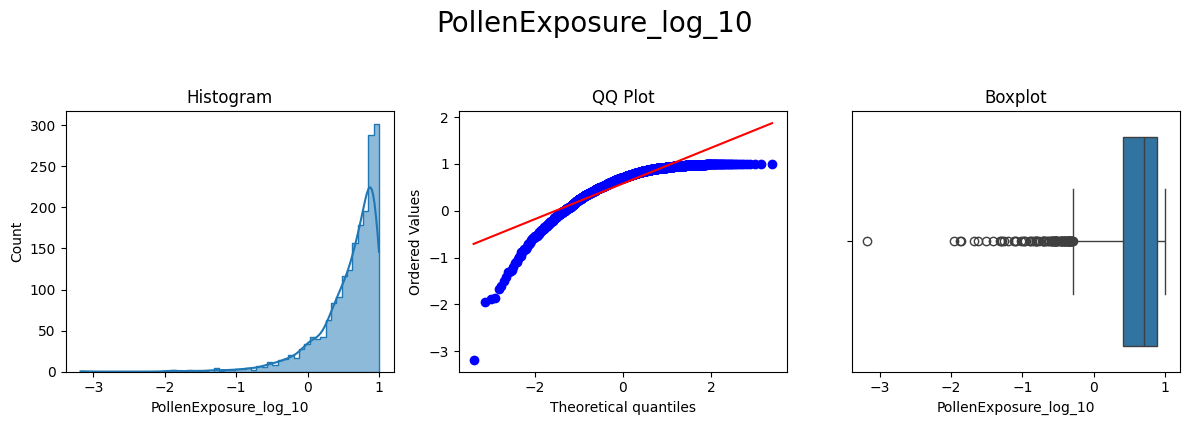

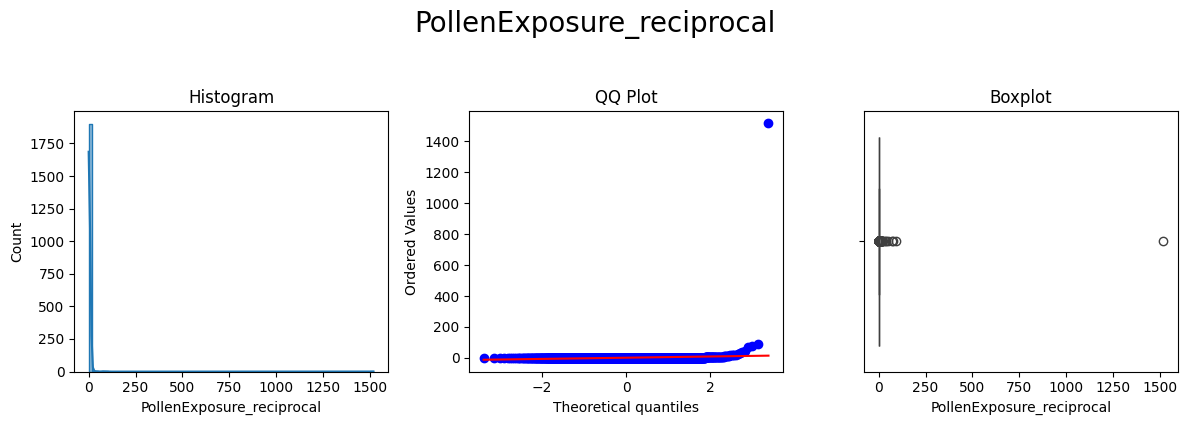

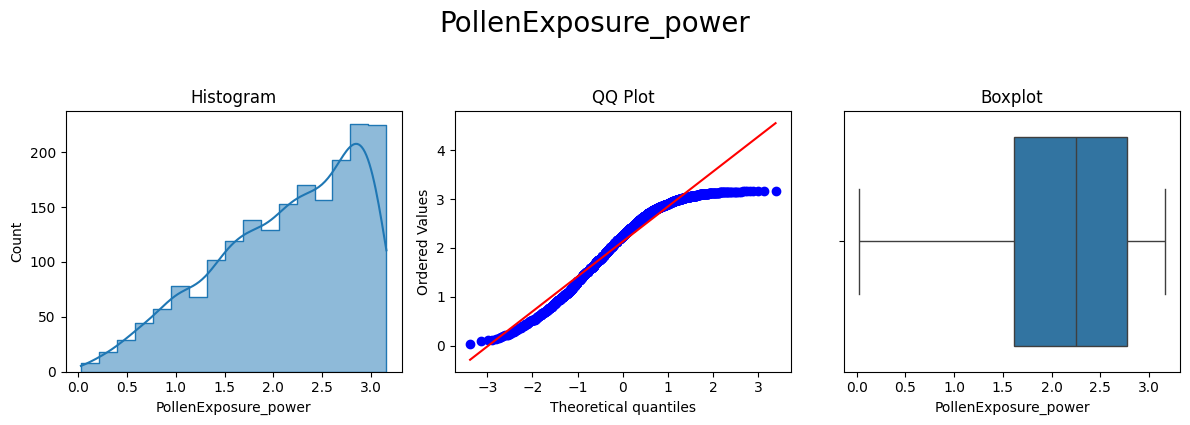

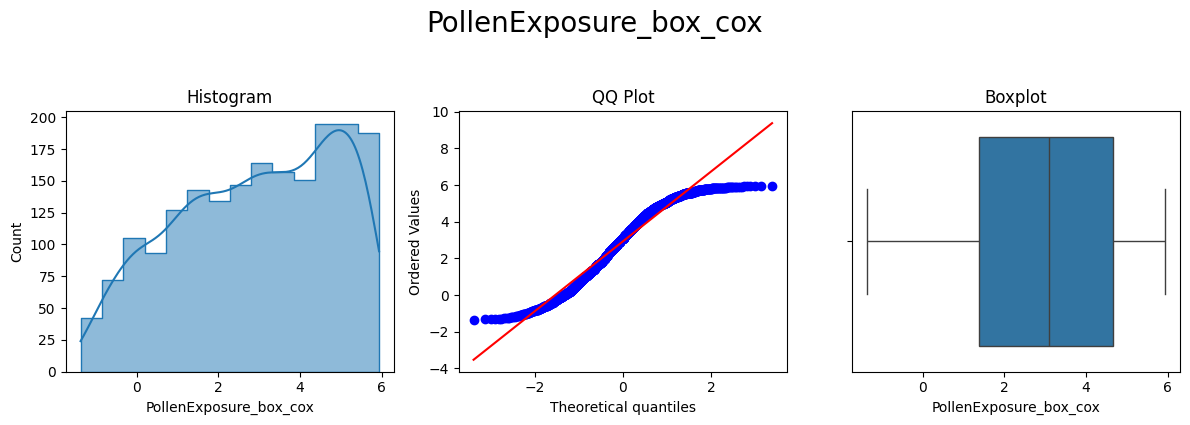

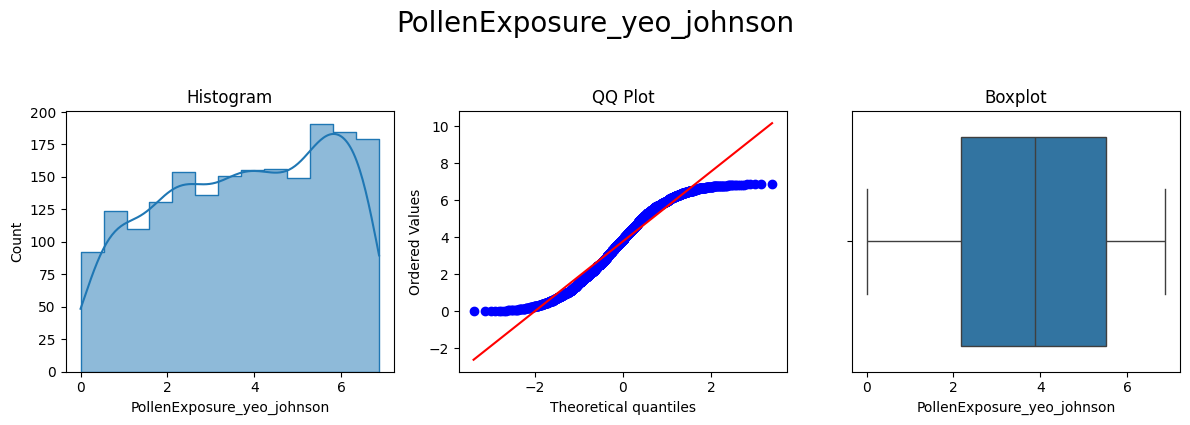


* Variable Analyzed: DustExposure
* Applied transformations: ['DustExposure_log_e', 'DustExposure_log_10', 'DustExposure_reciprocal', 'DustExposure_power', 'DustExposure_box_cox', 'DustExposure_yeo_johnson']



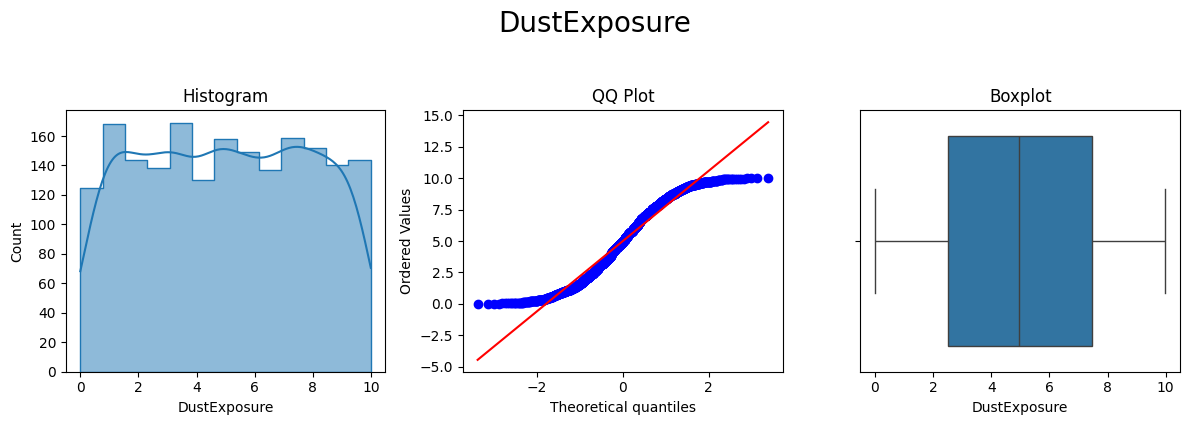

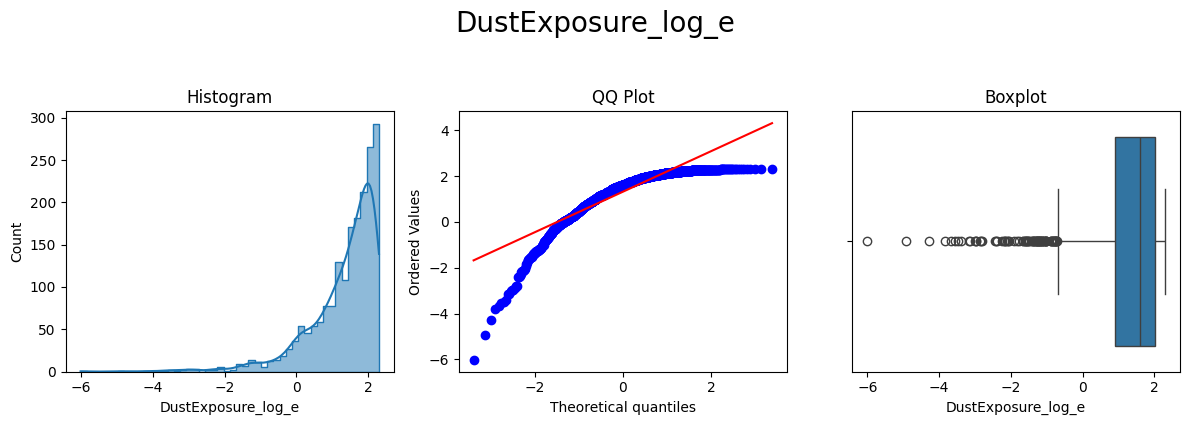

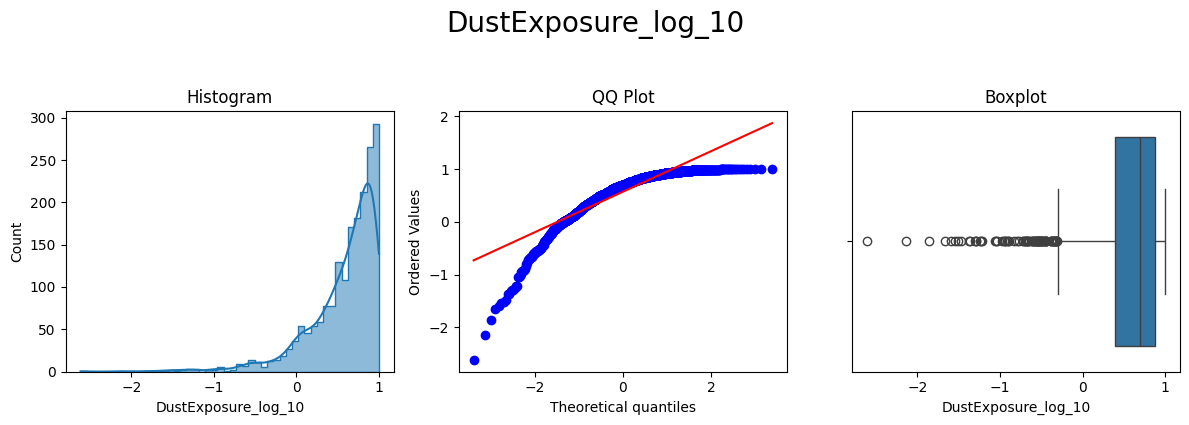

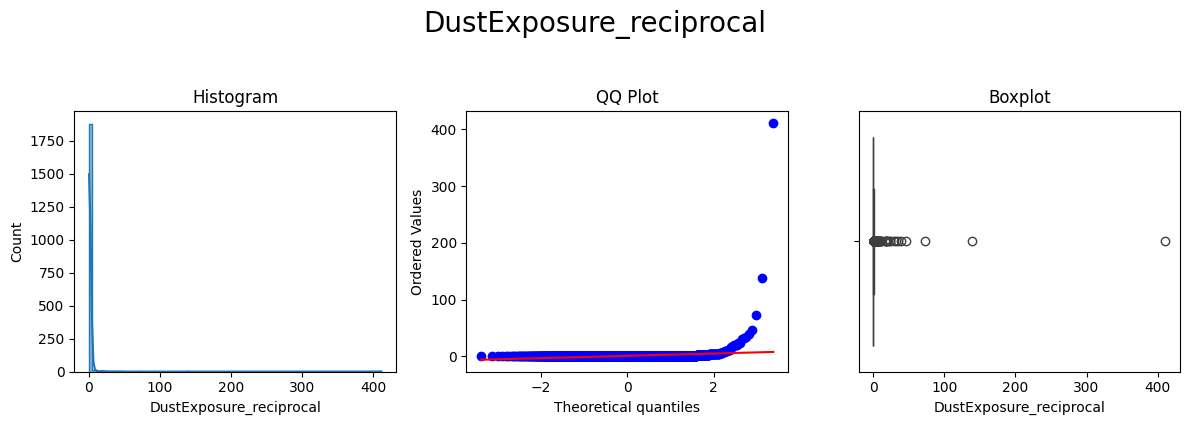

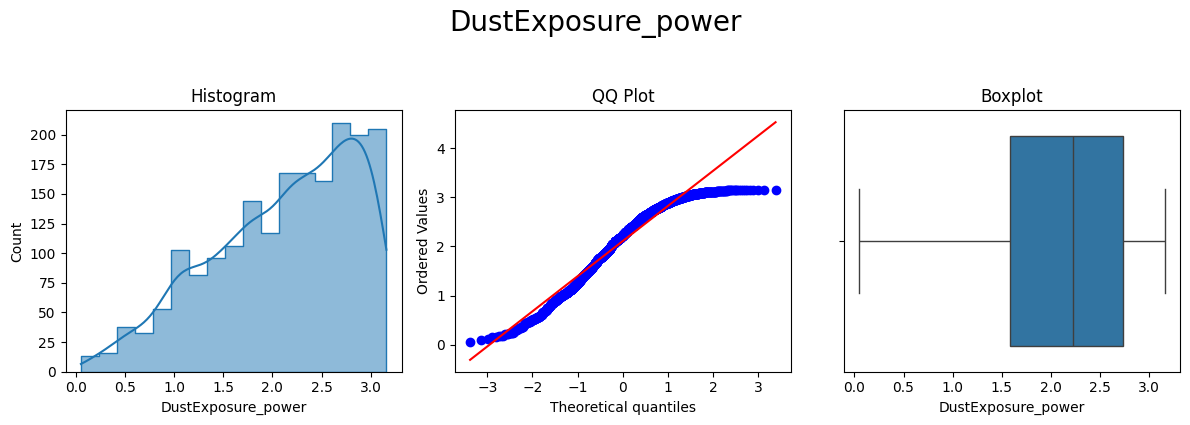

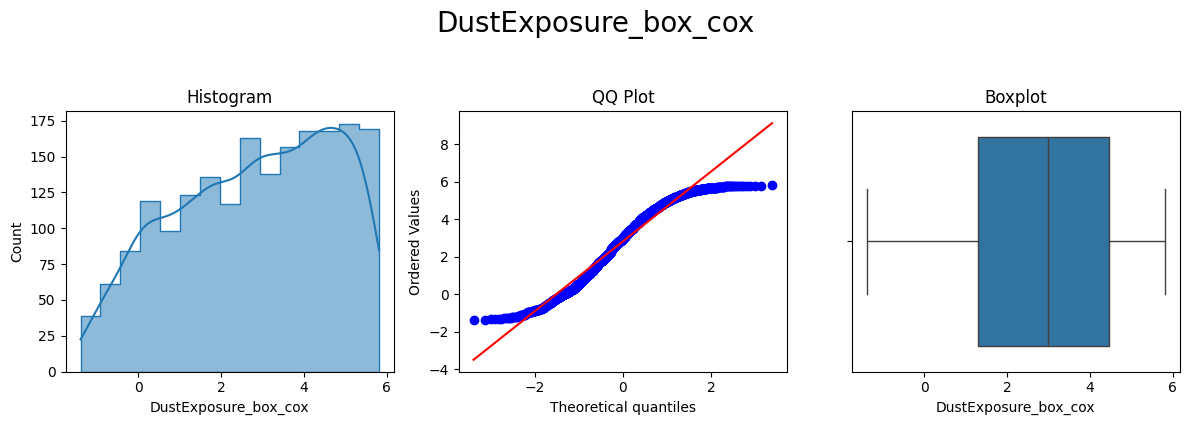

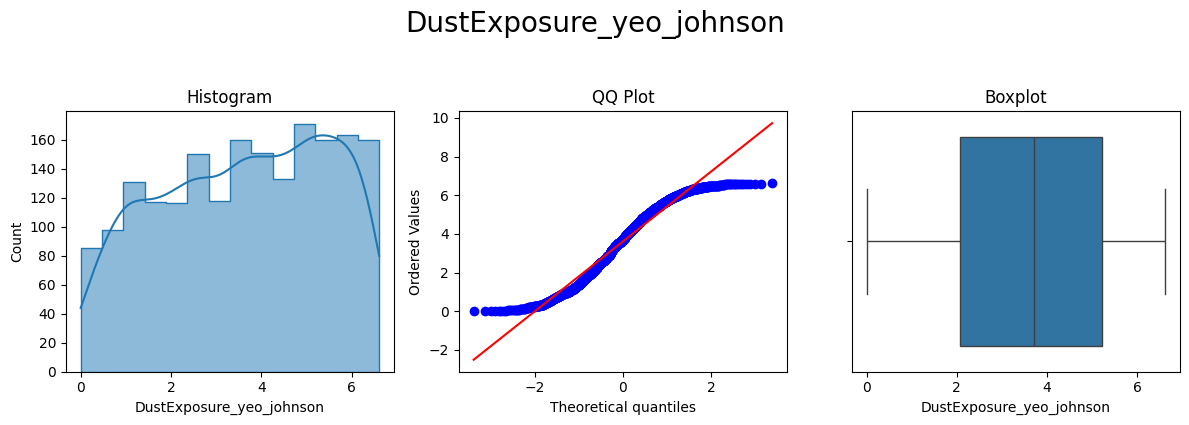


* Variable Analyzed: LungFunctionFEV1
* Applied transformations: ['LungFunctionFEV1_log_e', 'LungFunctionFEV1_log_10', 'LungFunctionFEV1_reciprocal', 'LungFunctionFEV1_power', 'LungFunctionFEV1_box_cox', 'LungFunctionFEV1_yeo_johnson']



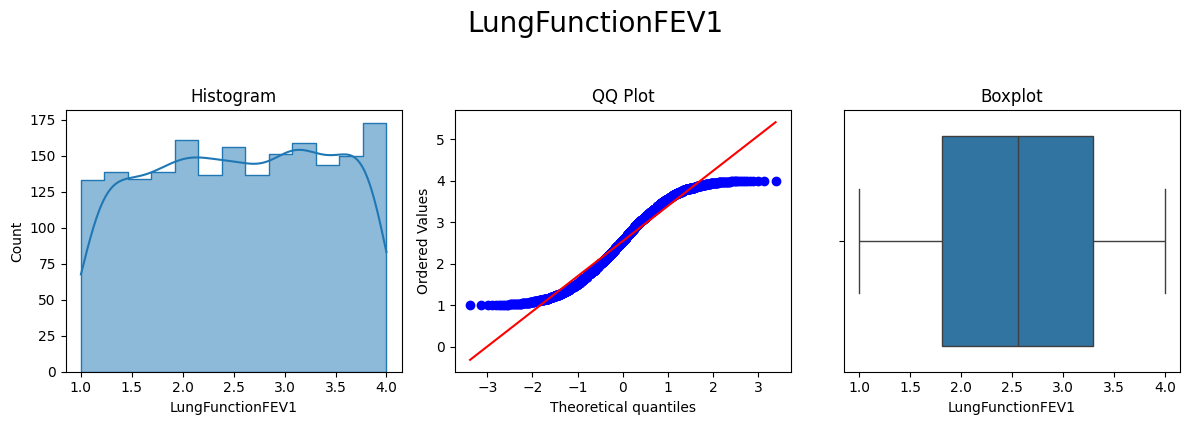

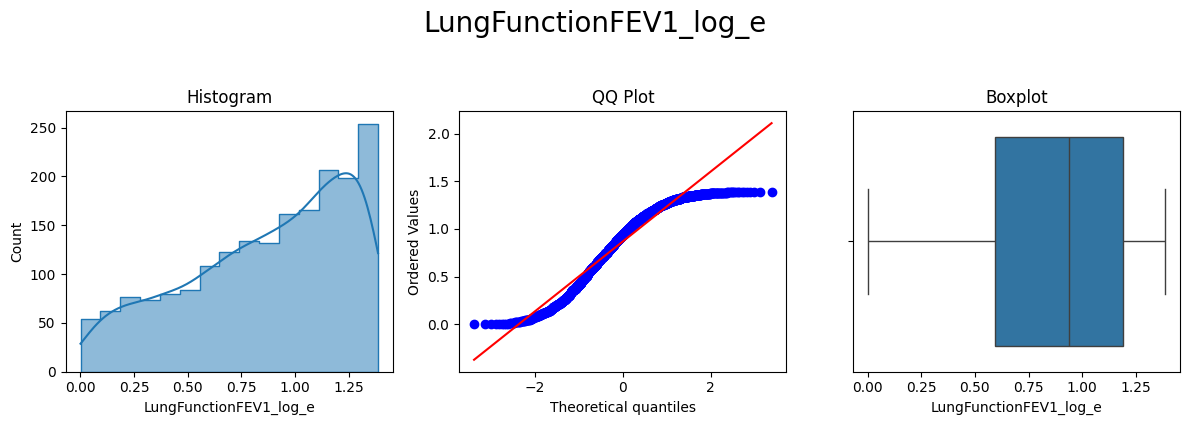

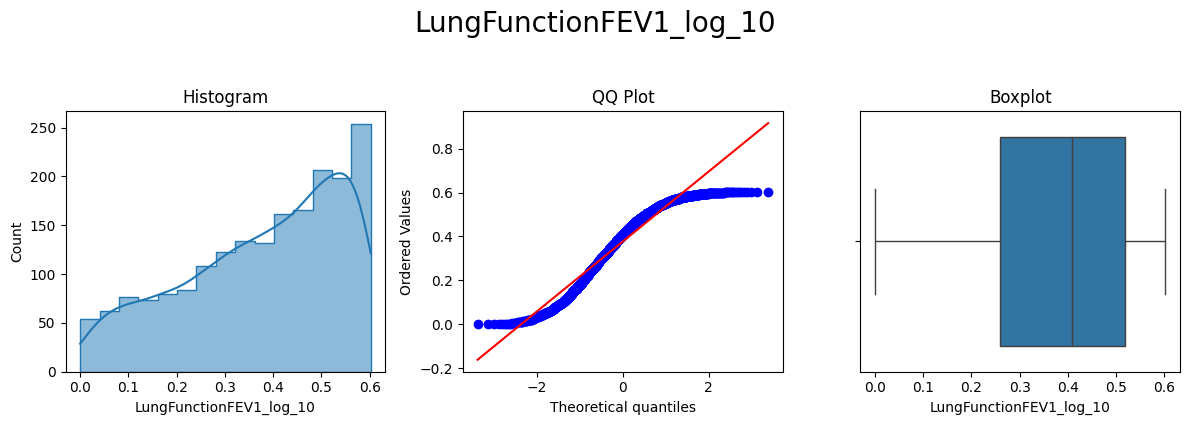

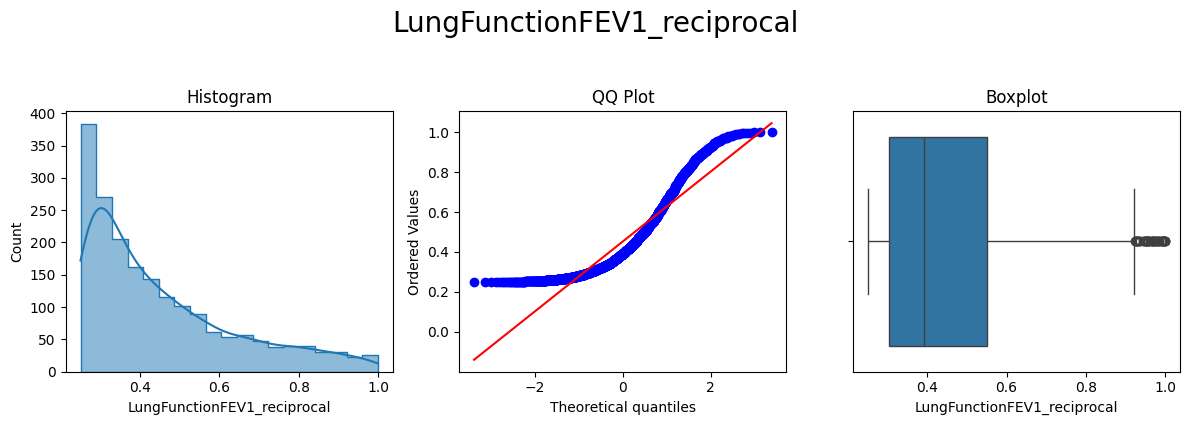

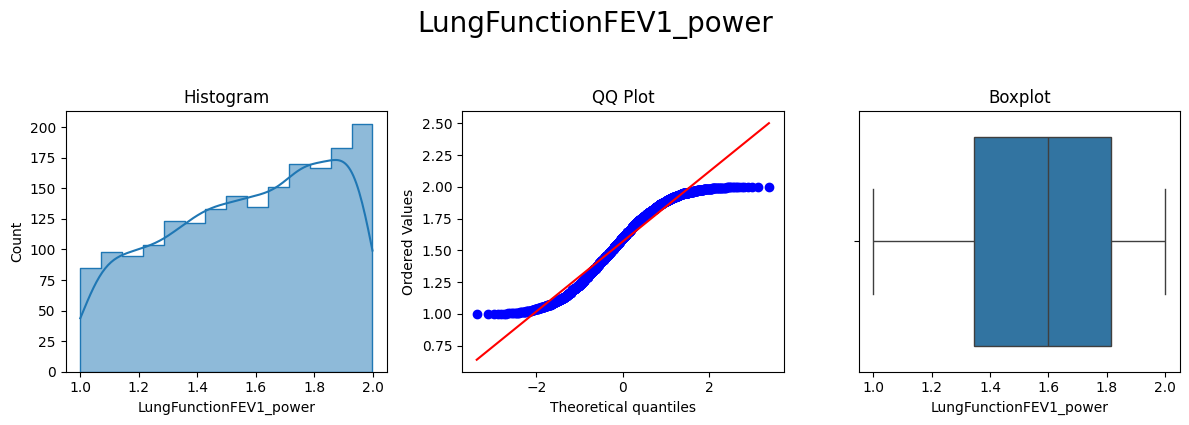

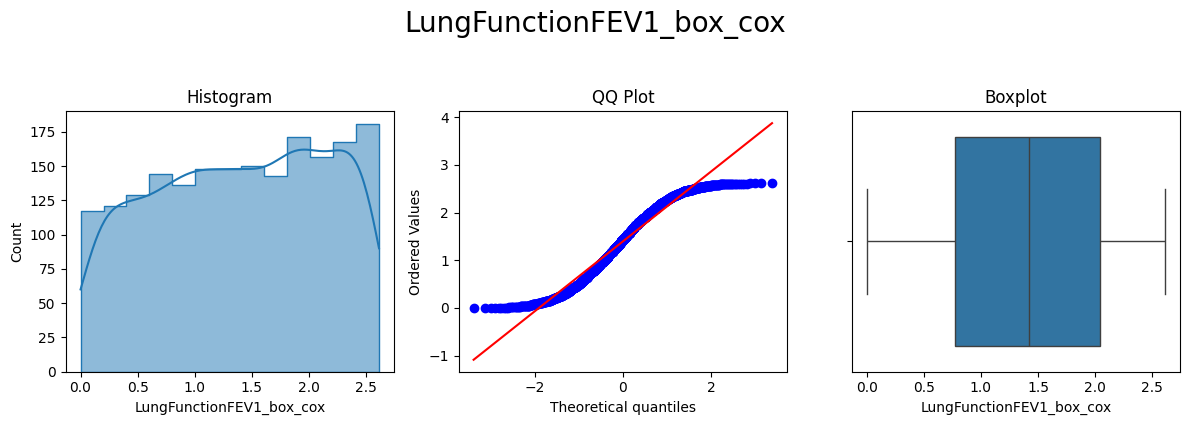

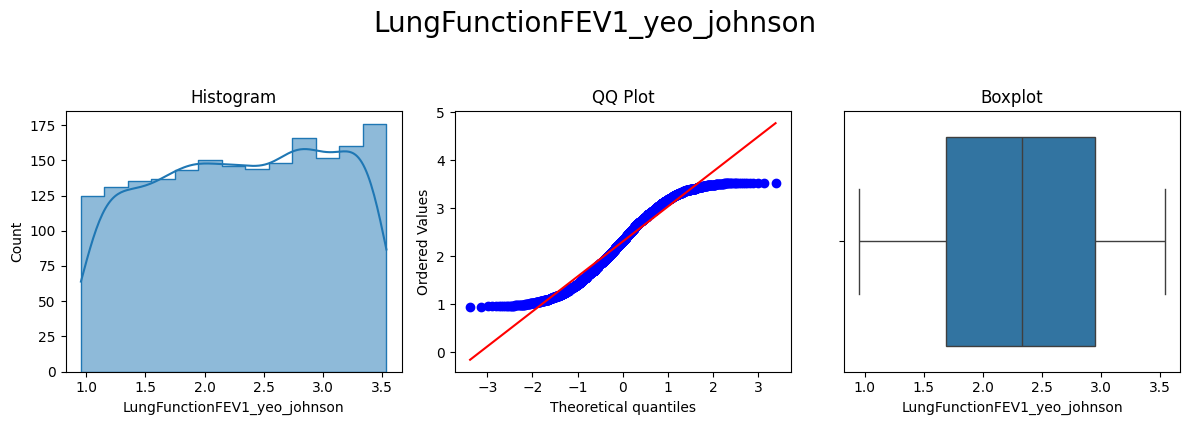


* Variable Analyzed: LungFunctionFVC
* Applied transformations: ['LungFunctionFVC_log_e', 'LungFunctionFVC_log_10', 'LungFunctionFVC_reciprocal', 'LungFunctionFVC_power', 'LungFunctionFVC_box_cox', 'LungFunctionFVC_yeo_johnson']



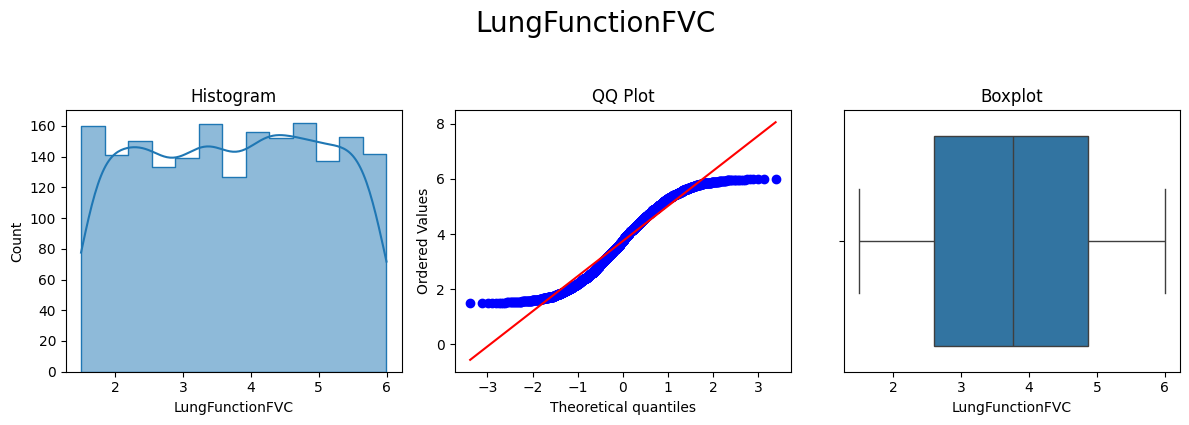

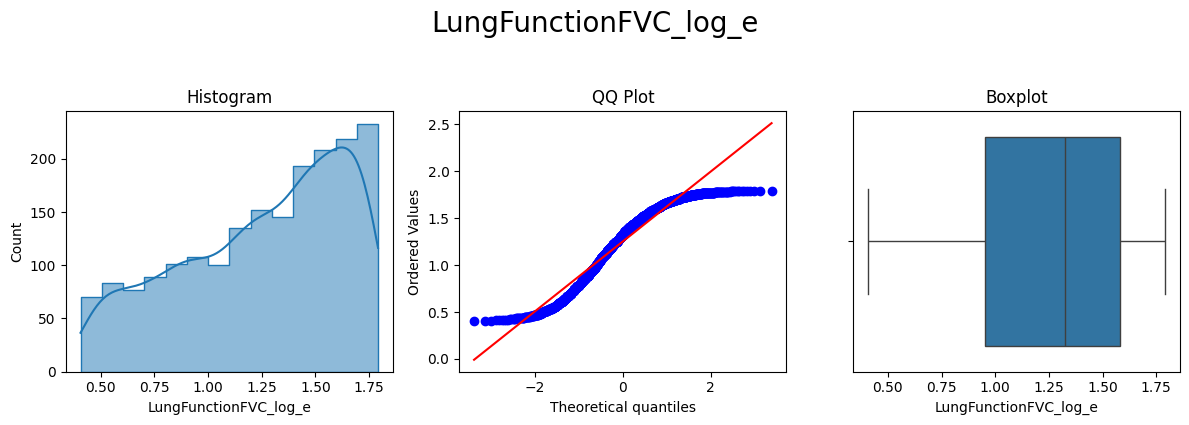

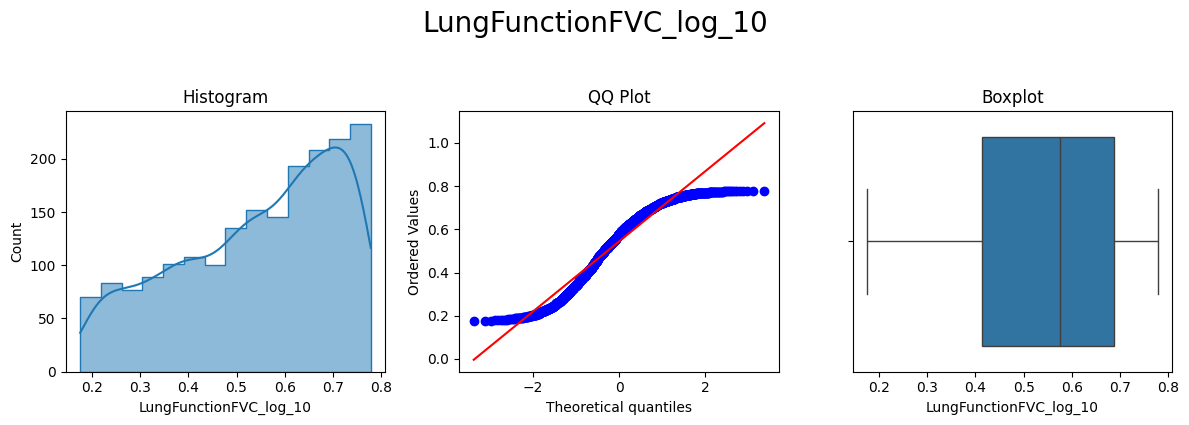

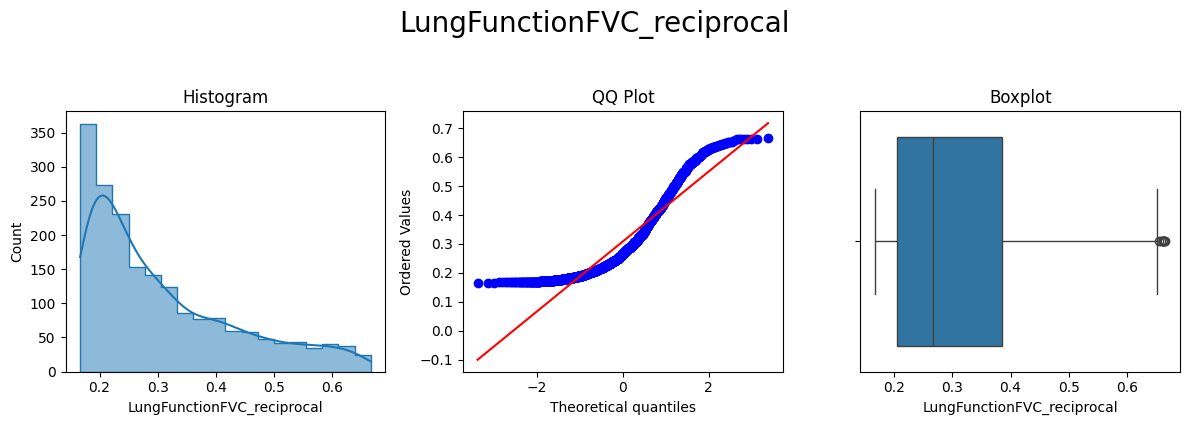

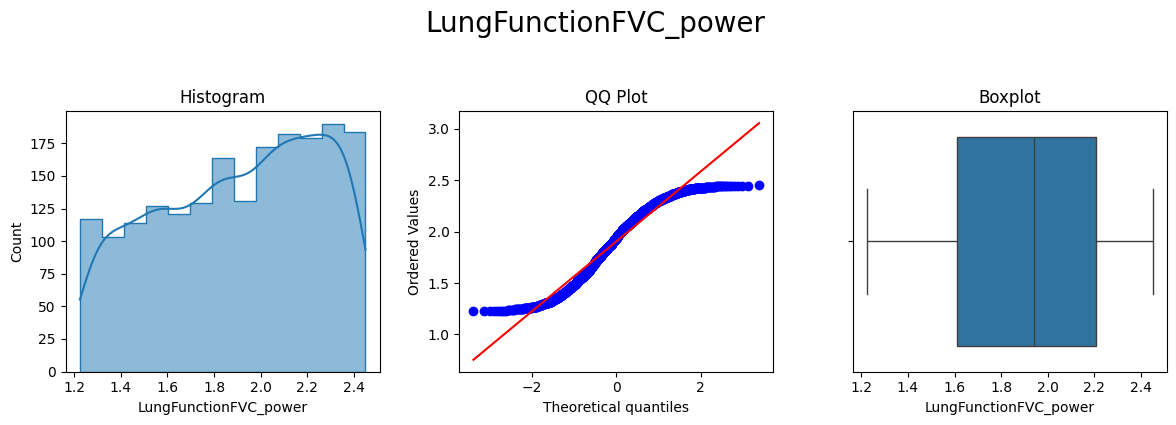

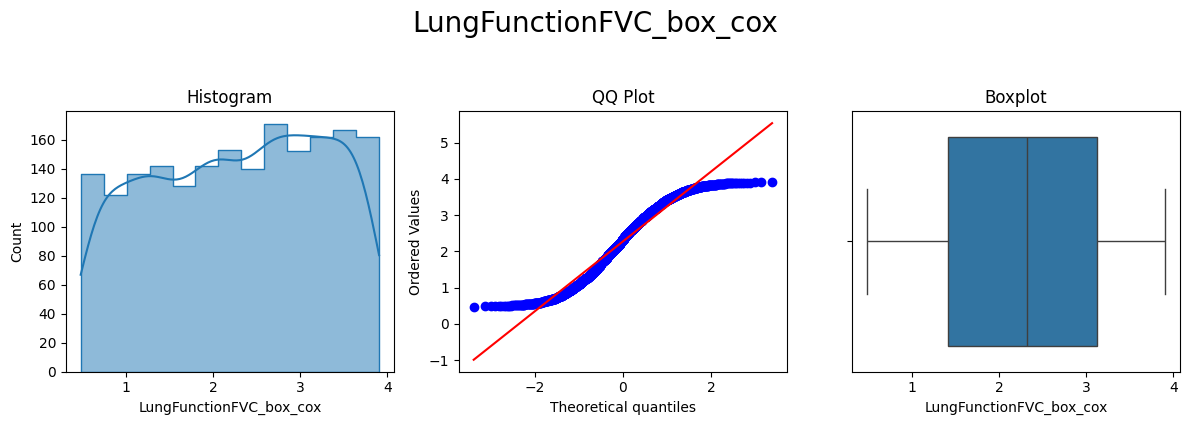

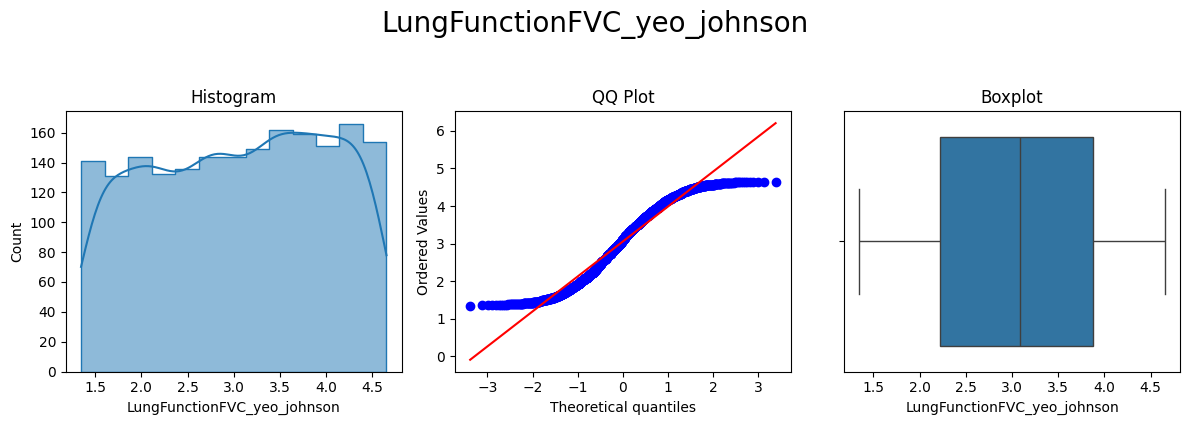

In [10]:
df_engineering_engineering = FeatureEngineeringAnalysis(
    df=df_engineering
)

For each feature, all transformations were tested. Log (base e), Log10, Reciprocal and Power transformations did not help make the disributions closer to normal.

Yeo-Johnson was chosen as the preferred transformation method to ensure uniform treatment of skewness and variance stabilization across all features. 

As these transformations improved the distribution of continuous features, they will be applied in the modeling algorithm.

In [11]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

df_engineering = Pipeline([
    # Yeo-Johnson for all continuous variables
    ('yeojohnson_transform', SklearnTransformerWrapper(
        transformer=PowerTransformer(method='yeo-johnson'),
        variables=[
            'Age', 'BMI',
            'PhysicalActivity', 'DietQuality', 'PollutionExposure',
            'PollenExposure', 'DustExposure',
            'LungFunctionFEV1', 'LungFunctionFVC',
            'SleepQuality'
        ]
    ))
])

TrainDataset = df_engineering.fit_transform(TrainDataset)
TestDataset = df_engineering .transform(TestDataset)
TrainDataset.head(10)

Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0  1.089211       0          1               0 -1.039899        0   
1 -0.416091       0          0               1  0.650231        1   
2 -0.817113       0          0               1  1.536262        0   
3 -1.566132       0          0               0  1.378817        0   
4 -0.368074       0          0               0 -0.606645        0   
5  1.397817       0          1               1 -1.108843        0   
6 -0.042539       0          1               1 -1.001012        0   
7 -1.317441       0          0               0 -1.707690        1   
8 -1.200269       1          0               1 -1.011782        0   
9 -0.662892       1          1               1 -0.416136        0   

   PhysicalActivity  DietQuality  SleepQuality  PollutionExposure  ...  \
0         -0.168936     0.201189     -0.088853          -0.695545  ...   
1          1.150304    -0.451752      1.355176           1.372862  ...   
2         -1.190219    -0.461727     -1.371679          -1.562803  ...   
3         -1.447539     0.456374     -0.057784          -1.152188  ...   
4         -0.206833     0.646326      0.052534          -1.290563  ...   
5          0.243984    -1.444311      0.066335           1.141203  ...   
6         -1.112684     1.323507      1.426905           0.420669  ...   
7          0.080296     1.023396     -0.918837           1.065695  ...   
8          0.534104    -0.155363     -1.297795           0.660508  ...   
9          0.310473     1.421665      0.472498           1.159196  ...   

   GastroesophagealReflux  LungFunctionFEV1  LungFunctionFVC  Wheezing  \
0                       0          1.348693        -1.783629         0   
1                       1         -0.756766        -0.878454         0   
2                       0         -1.196260        -1.007336         0   
3                       0          1.011667        -0.515471         0   
4                       0          0.062656         1.153851         1   
5                       0          0.192647        -0.150870         1   
6                       1         -1.763195         1.622052         1   
7                       1          1.576638         1.275793         0   
8                       0          0.625377         0.034948         0   
9                       0          0.419667         1.283791         1   

   ShortnessOfBreath  ChestTightness  Coughing  NighttimeSymptoms  \
0                  1               1         1                  1   
1                  0               0         0                  1   
2                  1               0         0                  0   
3                  1               0         1                  1   
4                  1               1         0                  1   
5                  0               0         1                  1   
6                  1               1         1                  0   
7                  1               0         1                  1   
8                  0               0         1                  1   
9                  0               1         1                  1   

   ExerciseInduced  Diagnosis  
0                0          0  
1                1          1  
2                0          0  
3                1          0  
4                1          1  
5                0          0  
6                0          0  
7                0          0  
8                0          1  
9                0          0  

[10 rows x 27 columns]

---

## SmartCorrelatedSelection

Multicollinearity occurs when features are highly correlated, providing overlapping information that can affect model performance. Within this section, we're going to use a transformer to check the relationship between features This means redundant ones will be removed, keeping only a single representative from each correlated group.

Create another copy of the test dataset DataFrame:

In [12]:
df_engineering = TrainDataset.copy()
df_engineering.head(5)

Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0  1.089211       0          1               0 -1.039899        0   
1 -0.416091       0          0               1  0.650231        1   
2 -0.817113       0          0               1  1.536262        0   
3 -1.566132       0          0               0  1.378817        0   
4 -0.368074       0          0               0 -0.606645        0   

   PhysicalActivity  DietQuality  SleepQuality  PollutionExposure  ...  \
0         -0.168936     0.201189     -0.088853          -0.695545  ...   
1          1.150304    -0.451752      1.355176           1.372862  ...   
2         -1.190219    -0.461727     -1.371679          -1.562803  ...   
3         -1.447539     0.456374     -0.057784          -1.152188  ...   
4         -0.206833     0.646326      0.052534          -1.290563  ...   

   GastroesophagealReflux  LungFunctionFEV1  LungFunctionFVC  Wheezing  \
0                       0          1.348693        -1.783629         0   
1                       1         -0.756766        -0.878454         0   
2                       0         -1.196260        -1.007336         0   
3                       0          1.011667        -0.515471         0   
4                       0          0.062656         1.153851         1   

   ShortnessOfBreath  ChestTightness  Coughing  NighttimeSymptoms  \
0                  1               1         1                  1   
1                  0               0         0                  1   
2                  1               0         0                  0   
3                  1               0         1                  1   
4                  1               1         0                  1   

   ExerciseInduced  Diagnosis  
0                0          0  
1                1          1  
2                0          0  
3                1          0  
4                1          1  

[5 rows x 27 columns]

Create the engineered features, applying SmartCorrelationSelection:

In [13]:
from feature_engine.selection import SmartCorrelatedSelection

corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", 
                                    threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[]

After applying the SmartCorrelatedSelection, a meaningful correlation was not found between any features in the dataset.

---

## Scaling

Continuous features within this dataset vary in units and range as shown in the DataExploration notebook. This variation can negatively impact the performance of alogorithms. StandardScaler feature to be applied to standardise the values of numeric features in the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

df_engineering = TrainDataset.copy

# Identify numeric (float) columns
continuous_features = TrainDataset.select_dtypes(include=['float']).columns

scaler = StandardScaler()

TrainDataset[continuous_features] = scaler.fit_transform(TrainDataset[continuous_features ])
TestDataset[continuous_features]  = scaler.transform(TestDataset[continuous_features ])



Check the mean and SD of continuous features:

In [ ]:
df_engineering.describe().round(2).T

count  mean   std   min   25%   50%   75%   max
Age                     1913.0 -0.00  1.00 -1.92 -0.82  0.05  0.85  1.59
Gender                  1913.0  0.49  0.50  0.00  0.00  0.00  1.00  1.00
Ethnicity               1913.0  0.39  0.49  0.00  0.00  0.00  1.00  1.00
EducationLevel          1913.0  0.70  0.46  0.00  0.00  1.00  1.00  1.00
BMI                     1913.0 -0.00  1.00 -1.78 -0.86  0.02  0.88  1.69
Smoking                 1913.0  0.14  0.35  0.00  0.00  0.00  0.00  1.00
PhysicalActivity        1913.0 -0.00  1.00 -1.92 -0.83  0.06  0.88  1.58
DietQuality             1913.0 -0.00  1.00 -1.90 -0.84  0.10  0.86  1.62
SleepQuality            1913.0  0.00  1.00 -1.82 -0.87  0.01  0.90  1.64
PollutionExposure       1913.0 -0.00  1.00 -1.94 -0.85  0.09  0.89  1.59
PollenExposure          1913.0  0.00  1.00 -1.95 -0.83  0.05  0.90  1.60
DustExposure            1913.0 -0.00  1.00 -1.95 -0.83  0.06  0.87  1.62
PetAllergy              1913.0  0.17  0.37  0.00  0.00  0.00  0.00  1.00
FamilyHistoryAsthma     1913.0  0.30  0.46  0.00  0.00  0.00  1.00  1.00
HistoryOfAllergies      1913.0  0.40  0.49  0.00  0.00  0.00  1.00  1.00
Eczema                  1913.0  0.20  0.40  0.00  0.00  0.00  0.00  1.00
HayFever                1913.0  0.25  0.43  0.00  0.00  0.00  1.00  1.00
GastroesophagealReflux  1913.0  0.16  0.36  0.00  0.00  0.00  0.00  1.00
LungFunctionFEV1        1913.0 -0.00  1.00 -1.82 -0.84  0.03  0.86  1.65
LungFunctionFVC         1913.0 -0.00  1.00 -1.79 -0.88  0.04  0.86  1.67
Wheezing                1913.0  0.59  0.49  0.00  0.00  1.00  1.00  1.00
ShortnessOfBreath       1913.0  0.51  0.50  0.00  0.00  1.00  1.00  1.00
ChestTightness          1913.0  0.50  0.50  0.00  0.00  1.00  1.00  1.00
Coughing                1913.0  0.49  0.50  0.00  0.00  0.00  1.00  1.00
NighttimeSymptoms       1913.0  0.61  0.49  0.00  0.00  1.00  1.00  1.00
ExerciseInduced         1913.0  0.61  0.49  0.00  0.00  1.00  1.00  1.00
Diagnosis               1913.0  0.05  0.23  0.00  0.00  0.00  0.00  1.00

---

# Conclusion and Next Steps

The following feature engineering steps were identified for enhancing predictive modeling:
* Binary / categorical features: none to be applied, already binary (0, 1)
* Continuous / numeric features: Yeo-Johnson transformations to be applied for consistency, and standardised using StandardScaler.
* All features to be utilised in the model as none were highly correlated

Next Steps:
Asthma status prediction and model performance evaluation